## Import Modules


In [ ]:
!pip install prophet


In [ ]:
!pip install tqdm

In [69]:
# Python
import pandas as pd
from prophet import Prophet
import tqdm as notebook_tqdm

In [70]:
from prophet import Prophet
from prophet.diagnostics import cross_validation
from prophet.diagnostics import performance_metrics
from prophet.plot import plot_cross_validation_metric

from prophet.plot import plot_plotly, plot_components_plotly
from prophet.plot import add_changepoints_to_plot
from prophet.diagnostics import cross_validation
from statsmodels.tools.eval_measures import rmse
from statsmodels.tools.eval_measures import mse
import matplotlib.pyplot as plt

# to mute Pandas warnings Prophet needs to fix
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
from prophet.diagnostics import performance_metrics


In [71]:
import pandas as pd
import numpy as np
import pandas as pd
import datetime as dt
from sklearn import metrics
import math
import itertools
from tqdm import tqdm
from multiprocessing import Pool, cpu_count

In [165]:
least_restricted = pd.read_csv('../data/least_restricted.csv')
most_restricted = pd.read_csv('../data/most_restricted.csv')

In [166]:
interesting_columns = ['depression', 'anxiety', 'addiction', 'counselling','mental_health']

least_restricted_df = {}
most_restricted_df = {}

for c in interesting_columns:
    lr = least_restricted[['week', c]]
    lr = lr.rename(columns={'week': 'ds', c: 'y'})
    least_restricted_df[c] = lr
    
    lr = most_restricted[['week', c]]
    lr = lr.rename(columns={'week': 'ds', c: 'y'})
    most_restricted_df[c] = lr

### Creating DataFrames for each set of lockdowns

### States With Most restrictions 
Alaska
California
Hawaii
Mass
Newyork
Washington 

### States with least restrictions 
Arizona
Florida
South Dakota
Texas





In [111]:
# Python
most_lockdowns = pd.DataFrame([
    {'holiday': 'stay_at_home', 'ds': '2020-03-23', 'lower_window': 0, 'ds_upper': '2020-06-07'},
    {'holiday': 'mask_mandate', 'ds': '2020-04-19', 'lower_window': 0, 'ds_upper': '2022-03-13'},
    {'holiday': 'gatherings_banned', 'ds': '2020-03-22', 'lower_window': 0, 'ds_upper': '2021-04-18'},
    {'holiday': 'business_closures', 'ds': '2020-03-22', 'lower_window': 0, 'ds_upper': '2021-05-23'},
    {'holiday': 'travel_restrictions', 'ds': '2020-03-22', 'lower_window': 0, 'ds_upper': '2021-09-05'},
])
for t_col in ['ds', 'ds_upper']:
    most_lockdowns[t_col] = pd.to_datetime(most_lockdowns[t_col])
most_lockdowns['upper_window'] = (most_lockdowns['ds_upper'] - most_lockdowns['ds']).dt.days
most_lockdowns

holiday         ds  lower_window   ds_upper  upper_window
0         stay_at_home 2020-03-23             0 2020-06-07            76
1         mask_mandate 2020-04-19             0 2022-03-13           693
2    gatherings_banned 2020-03-22             0 2021-04-18           392
3    business_closures 2020-03-22             0 2021-05-23           427
4  travel_restrictions 2020-03-22             0 2021-09-05           532

In [112]:
# Python
least_lockdowns = pd.DataFrame([
    {'holiday': 'stay_at_home', 'ds': '2020-04-05', 'lower_window': 0, 'ds_upper': '2020-05-10'},
    {'holiday': 'gatherings_banned', 'ds': '2020-04-05', 'lower_window': 0, 'ds_upper': '2020-09-20'},
    {'holiday': 'business_closures', 'ds': '2020-04-05', 'lower_window': 0, 'ds_upper': '2021-03-14'},
    {'holiday': 'travel_restrictions', 'ds': '2020-04-12', 'lower_window': 0, 'ds_upper': '2020-05-10'},
])
for t_col in ['ds', 'ds_upper']:
    least_lockdowns[t_col] = pd.to_datetime(least_lockdowns[t_col])
least_lockdowns['upper_window'] = (least_lockdowns['ds_upper'] - least_lockdowns['ds']).dt.days
least_lockdowns

holiday         ds  lower_window   ds_upper  upper_window
0         stay_at_home 2020-04-05             0 2020-05-10            35
1    gatherings_banned 2020-04-05             0 2020-09-20           168
2    business_closures 2020-04-05             0 2021-03-14           343
3  travel_restrictions 2020-04-12             0 2020-05-10            28

In [180]:
### grid search results on the depression dataframe below
##They did not end 

In [ ]:
(holidays=most_lockdowns,seasonality_mode='multiplicative',changepoint_prior_scale=0.05, changepoint_range =.8,seasonality_prior_scale =1.0,
         holidays_prior_scale = 0.1, growth = 'linear', yearly_seasonality =20)

# Predicting 2020-5-30
# Most restricted states with exogenous features

17:02:13 - cmdstanpy - INFO - Chain [1] start processing
17:02:13 - cmdstanpy - INFO - Chain [1] done processing


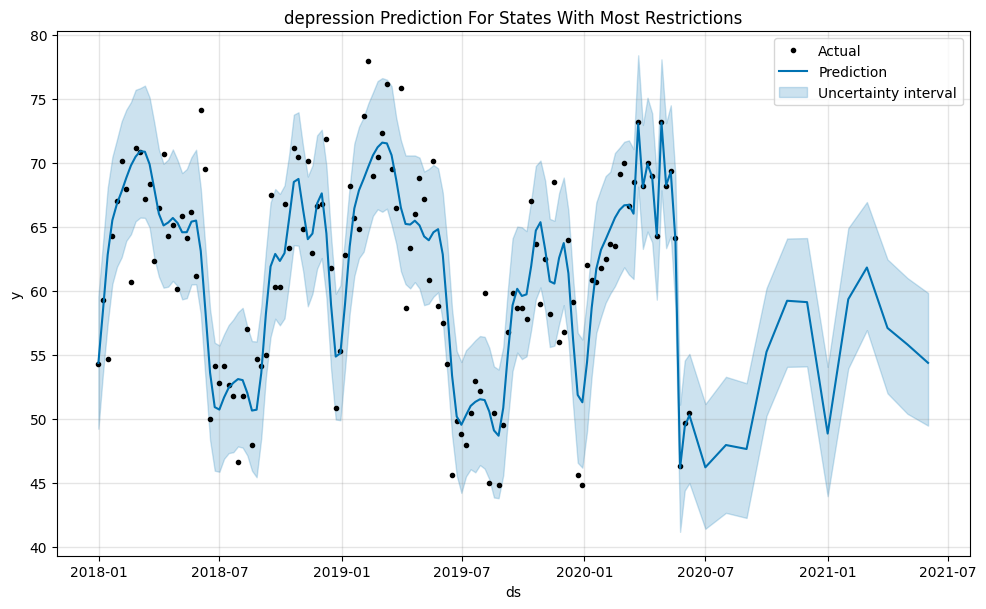

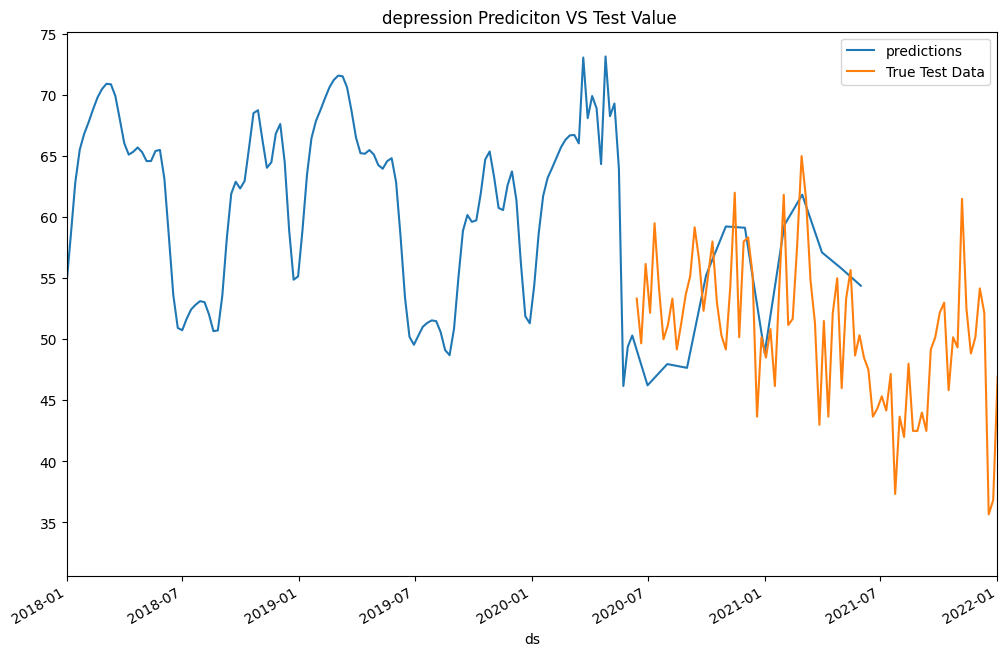

MSE for depression: 201


17:02:15 - cmdstanpy - INFO - Chain [1] start processing
17:02:16 - cmdstanpy - INFO - Chain [1] done processing


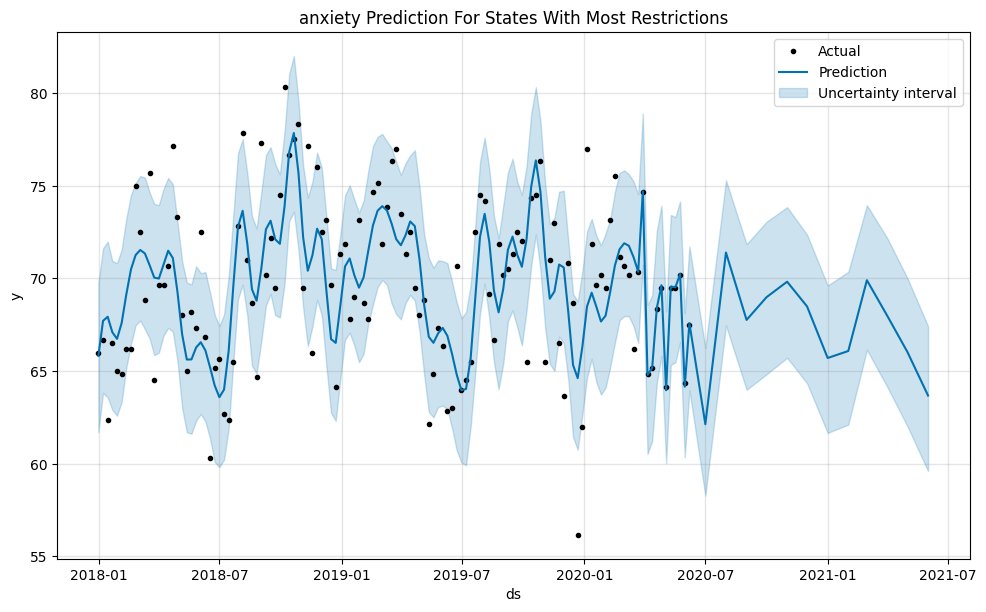

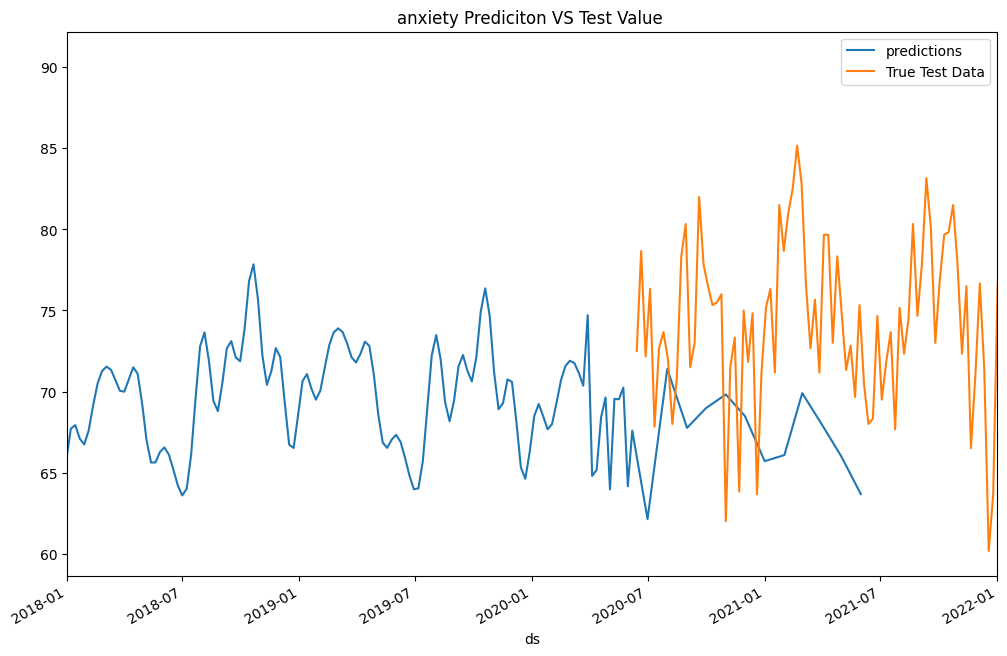

MSE for anxiety: 58


17:02:18 - cmdstanpy - INFO - Chain [1] start processing
17:02:18 - cmdstanpy - INFO - Chain [1] done processing


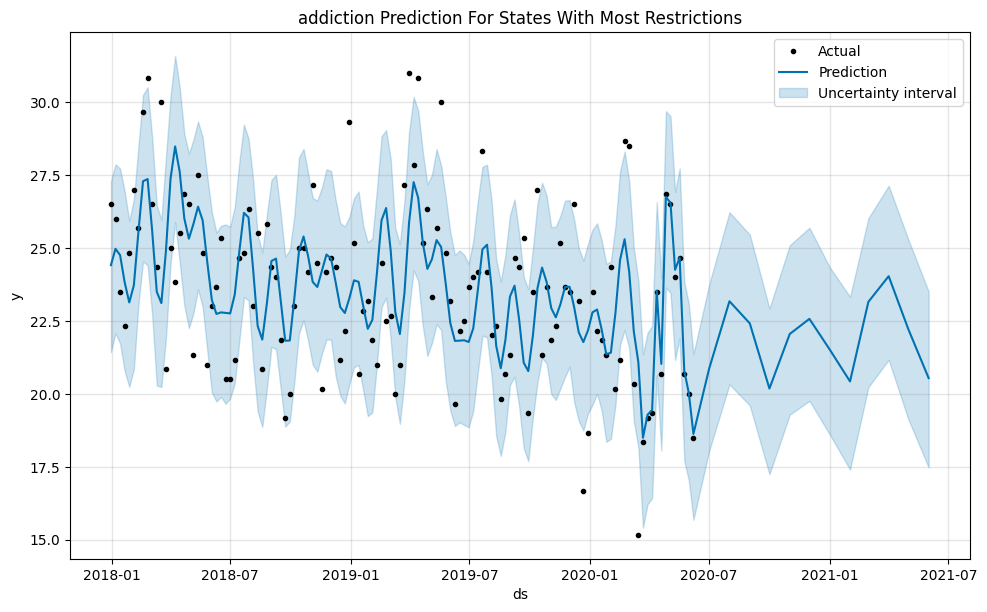

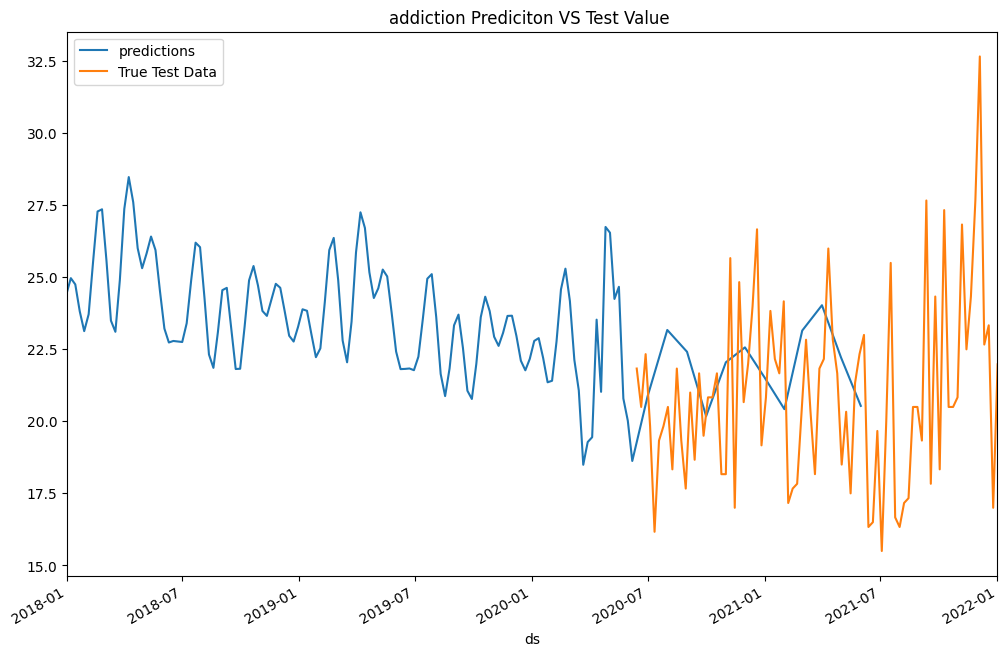

MSE for addiction: 19


17:02:20 - cmdstanpy - INFO - Chain [1] start processing
17:02:20 - cmdstanpy - INFO - Chain [1] done processing


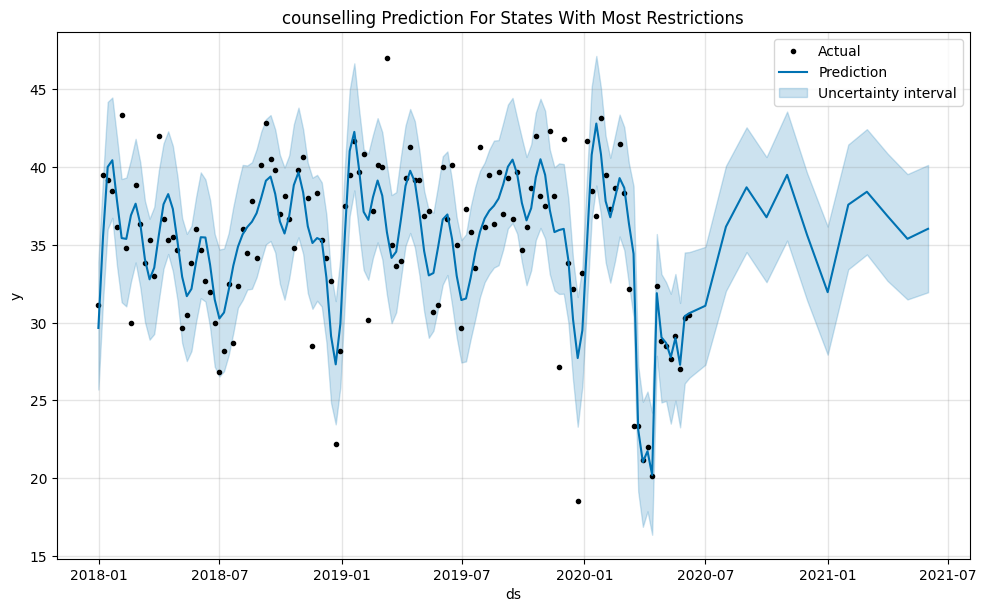

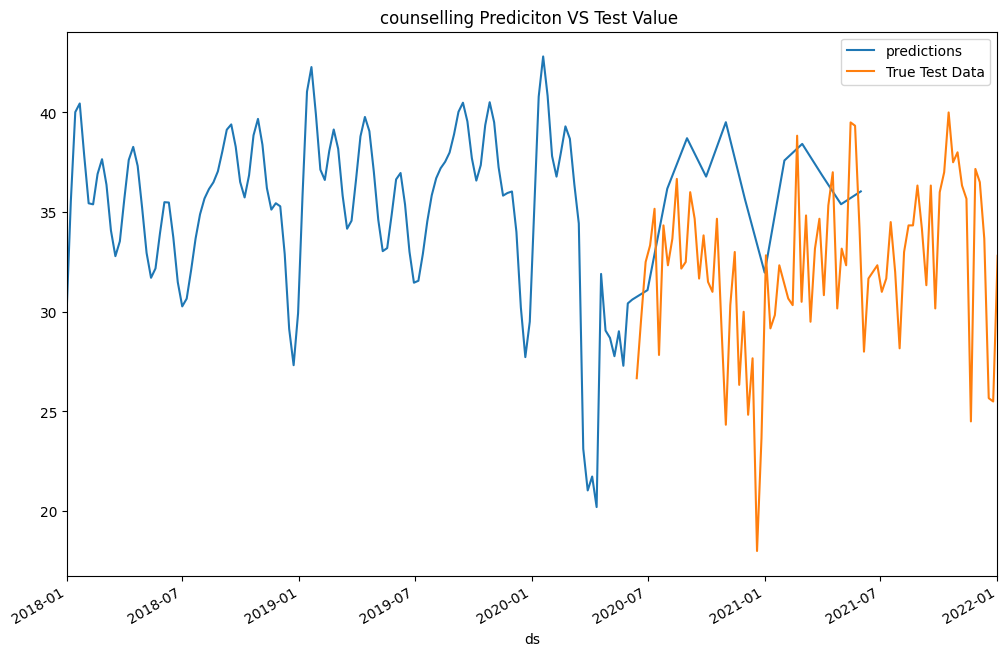

MSE for counselling: 40


17:02:22 - cmdstanpy - INFO - Chain [1] start processing
17:02:22 - cmdstanpy - INFO - Chain [1] done processing


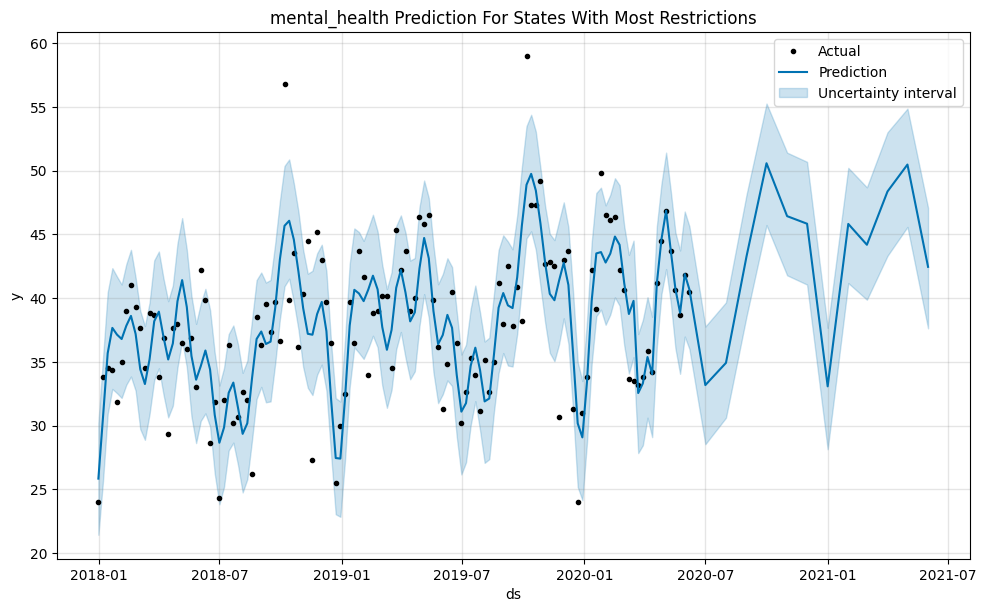

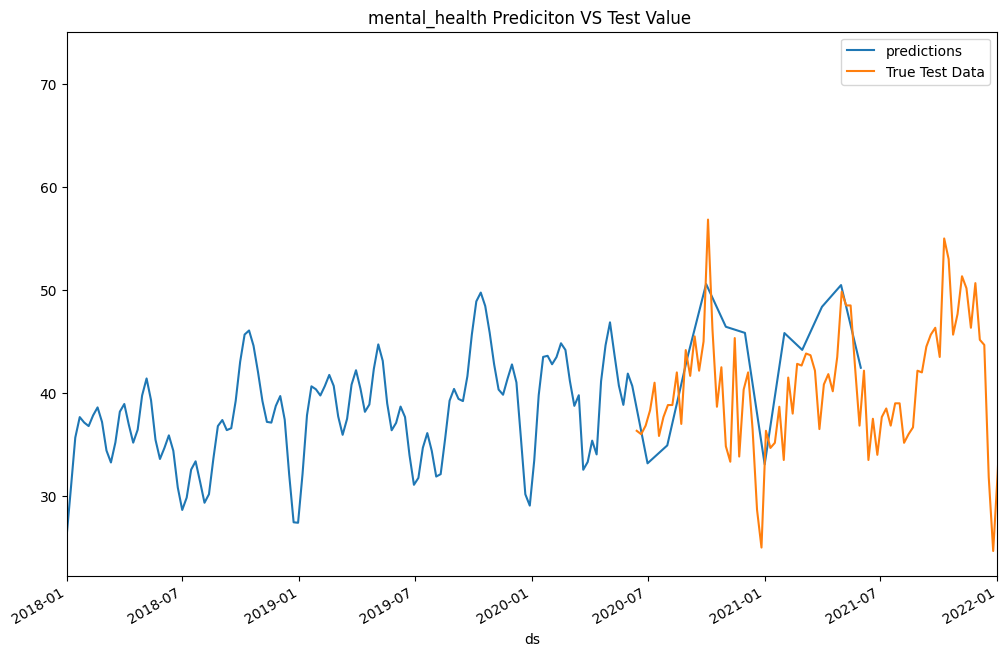

MSE for mental_health: 139


In [178]:
for c in interesting_columns:
    item = most_restricted_df[c]
    item['ds']=pd.to_datetime(item.ds)

    
    train=item[:128]
    test=item[128:]
    m=Prophet(holidays=most_lockdowns,seasonality_mode='multiplicative')
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    m.plot(forecast)
    plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
    plt.title(f'{c} Prediction For States With Most Restrictions')
    ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2018-01-01','2022-01-01'))
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    plt.title(f'{c} Prediciton VS Test Value ')
    plt.show()


    print(f"MSE for {c}: {round(mse(predictions, actuals))}")

# Most restricted without exogenous features  2020-5-30

In [138]:
for item, name in zip(most_list, search_list):
    
    train=item[:128]
    test=item[128:]
    m=Prophet()
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    print(f"MSE for {name}: {round(mse(predictions, actuals))}")


16:09:55 - cmdstanpy - INFO - Chain [1] start processing
16:09:55 - cmdstanpy - INFO - Chain [1] done processing
16:09:55 - cmdstanpy - INFO - Chain [1] start processing
16:09:55 - cmdstanpy - INFO - Chain [1] done processing
16:09:56 - cmdstanpy - INFO - Chain [1] start processing
16:09:56 - cmdstanpy - INFO - Chain [1] done processing


MSE for Depression: 197
MSE for Anxiety: 56


16:09:56 - cmdstanpy - INFO - Chain [1] start processing
16:09:56 - cmdstanpy - INFO - Chain [1] done processing
16:09:56 - cmdstanpy - INFO - Chain [1] start processing
16:09:56 - cmdstanpy - INFO - Chain [1] done processing


MSE for Addiction: 18
MSE for Counselling: 35
MSE for Mental_Health: 138


# Least restricitons with exogenous features 2020-5-30

16:21:31 - cmdstanpy - INFO - Chain [1] start processing
16:21:31 - cmdstanpy - INFO - Chain [1] done processing


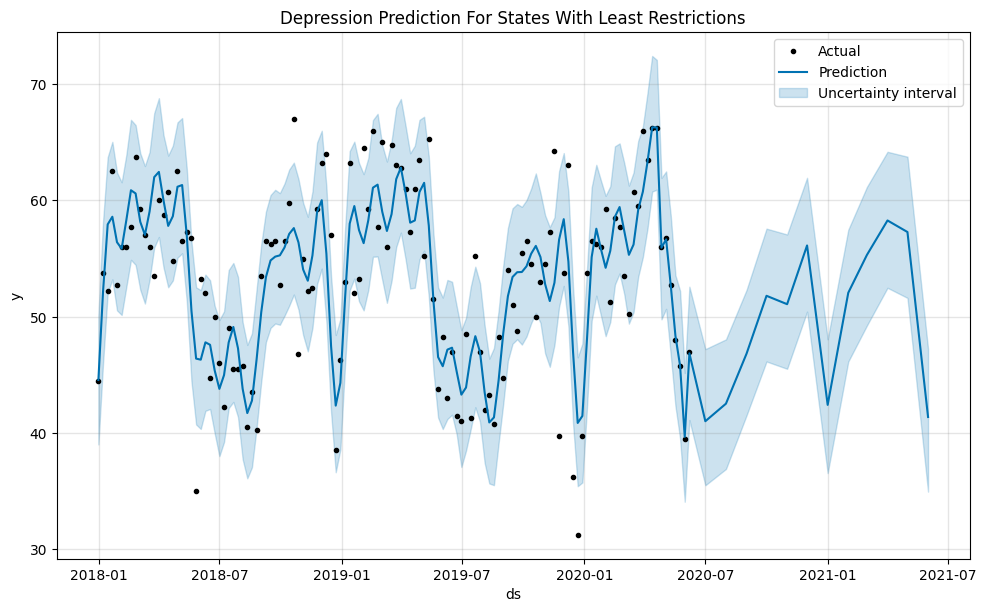

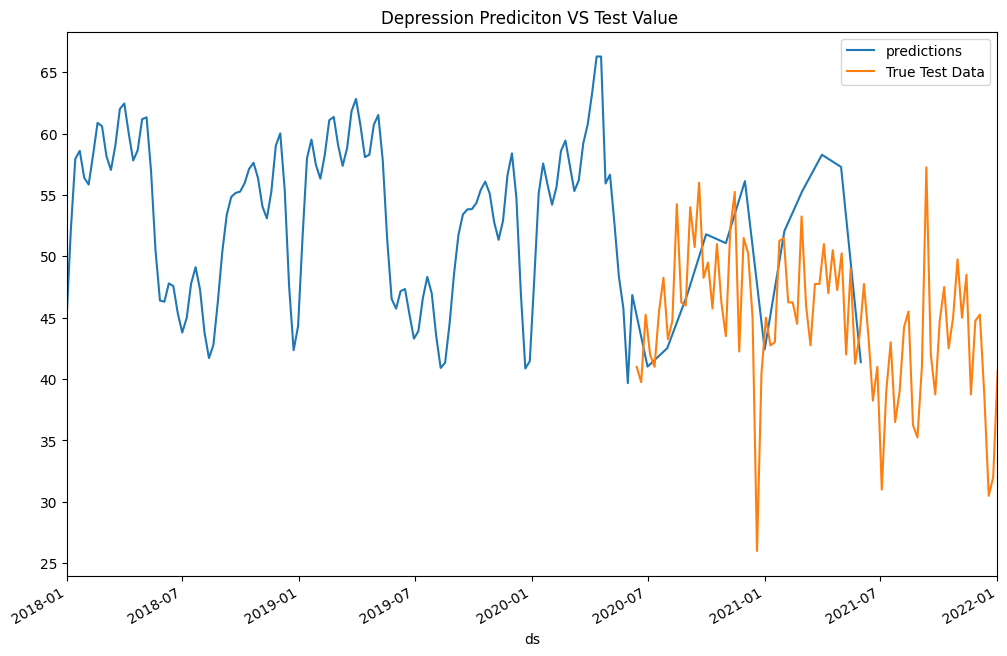

16:21:32 - cmdstanpy - INFO - Chain [1] start processing


MSE for Depression: 162


16:21:32 - cmdstanpy - INFO - Chain [1] done processing


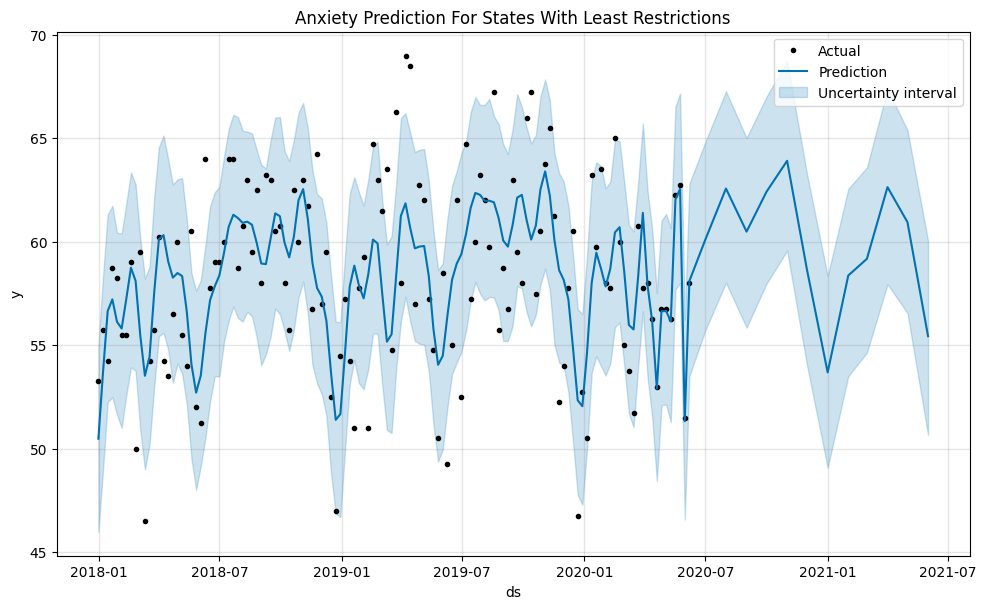

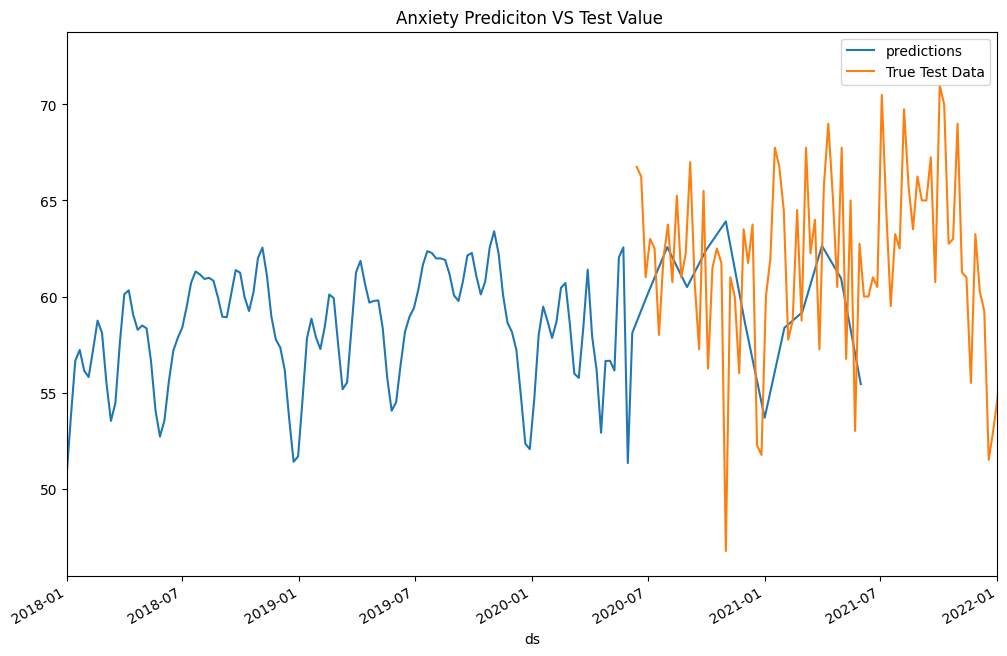

MSE for Anxiety: 47


16:21:34 - cmdstanpy - INFO - Chain [1] start processing
16:21:34 - cmdstanpy - INFO - Chain [1] done processing


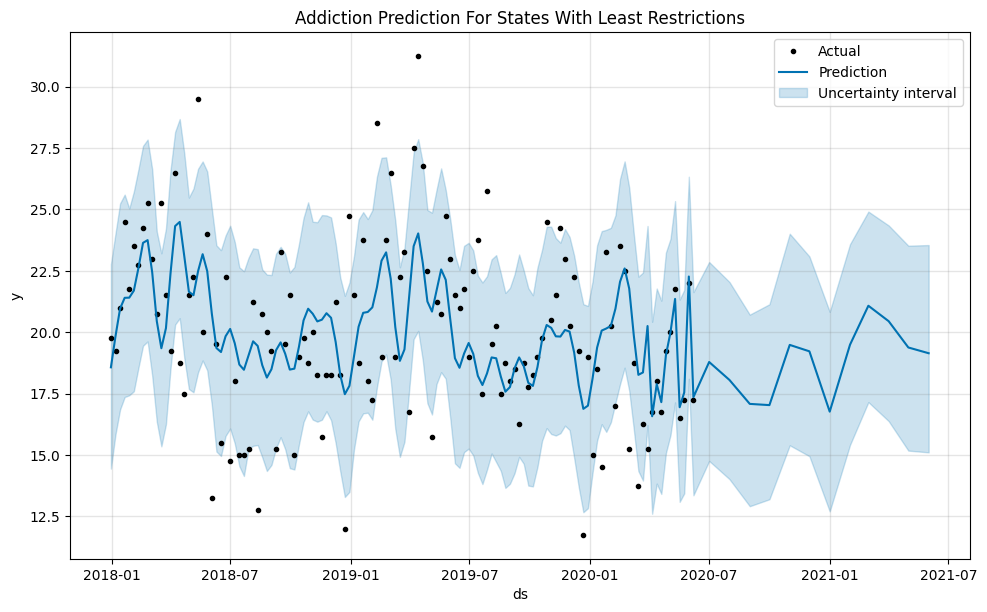

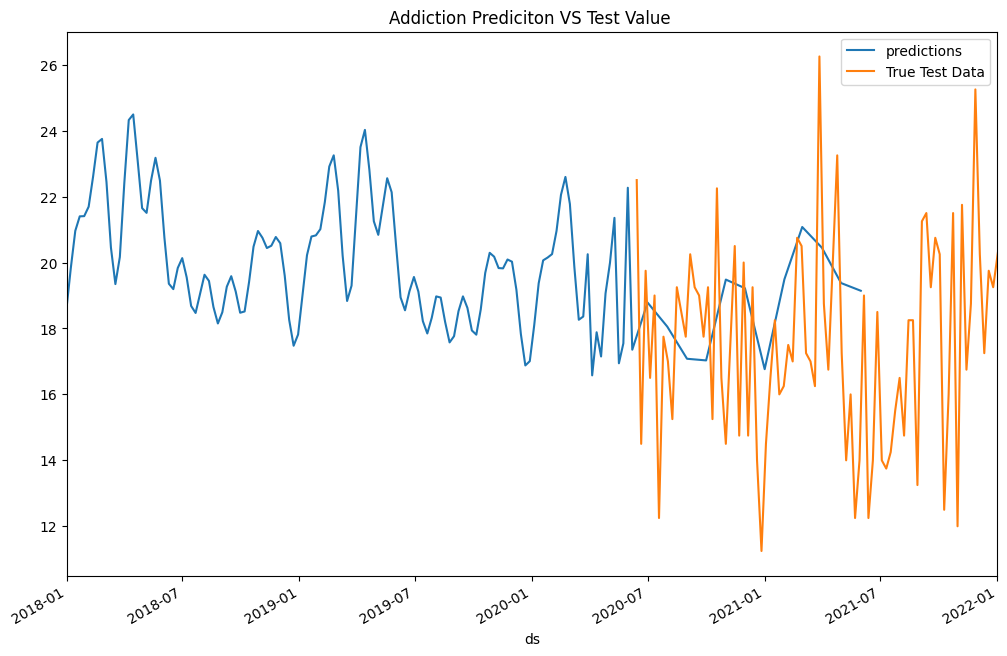

16:21:35 - cmdstanpy - INFO - Chain [1] start processing


MSE for Addiction: 16


16:21:35 - cmdstanpy - INFO - Chain [1] done processing


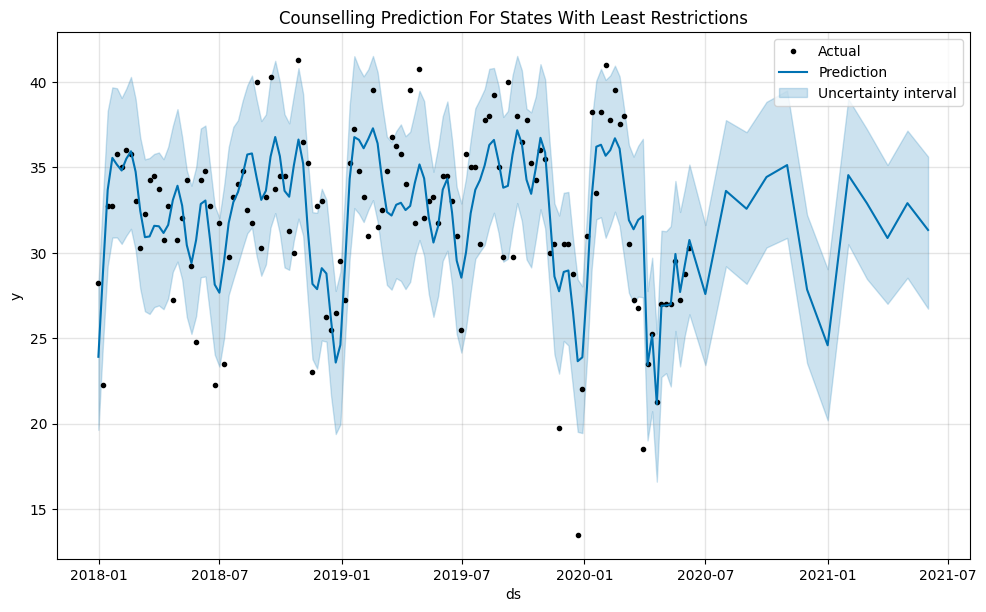

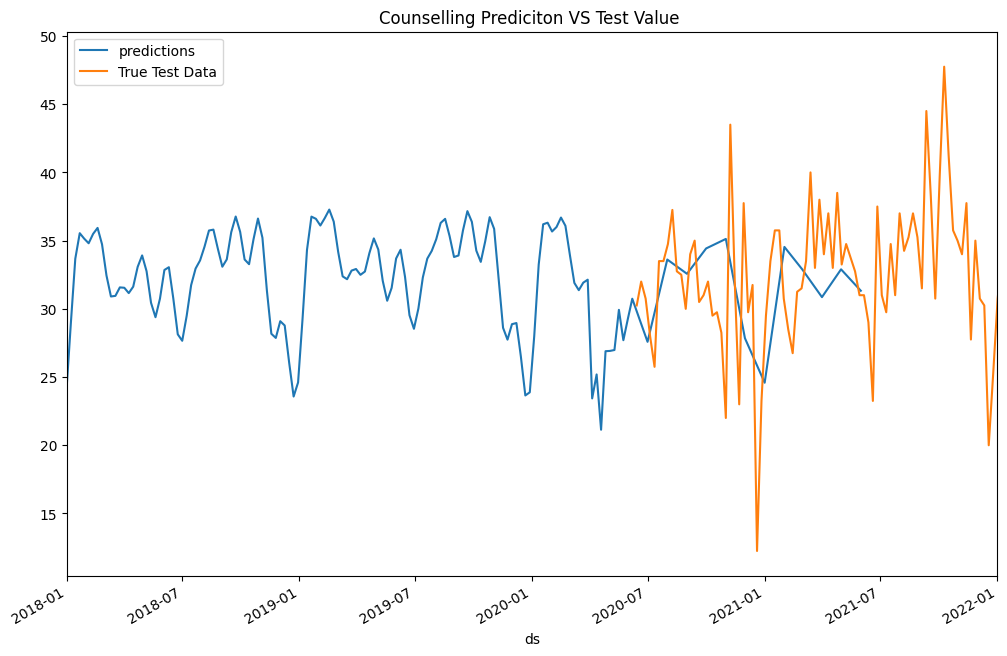

16:21:36 - cmdstanpy - INFO - Chain [1] start processing


MSE for Counselling: 51


16:21:36 - cmdstanpy - INFO - Chain [1] done processing


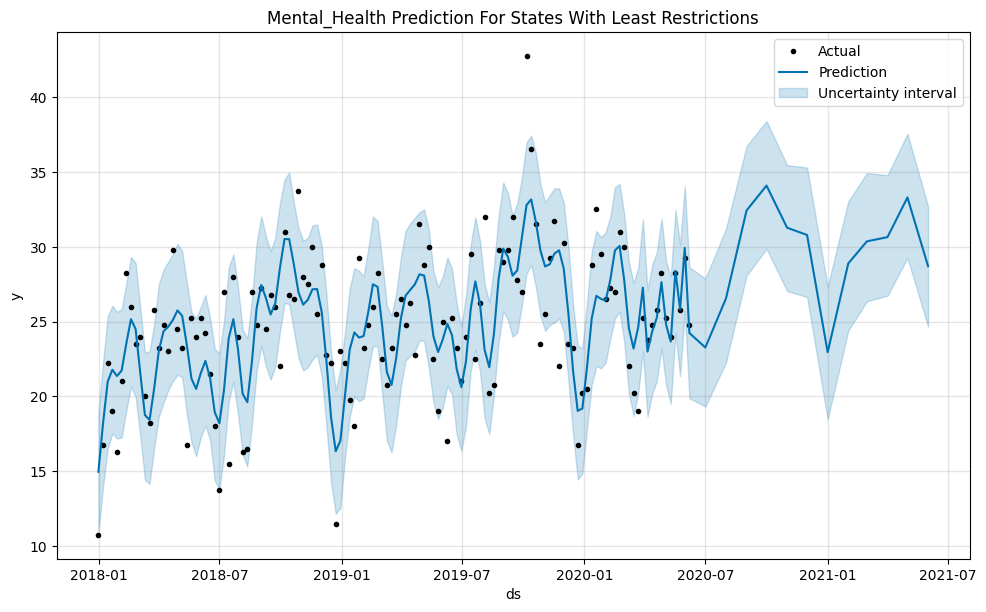

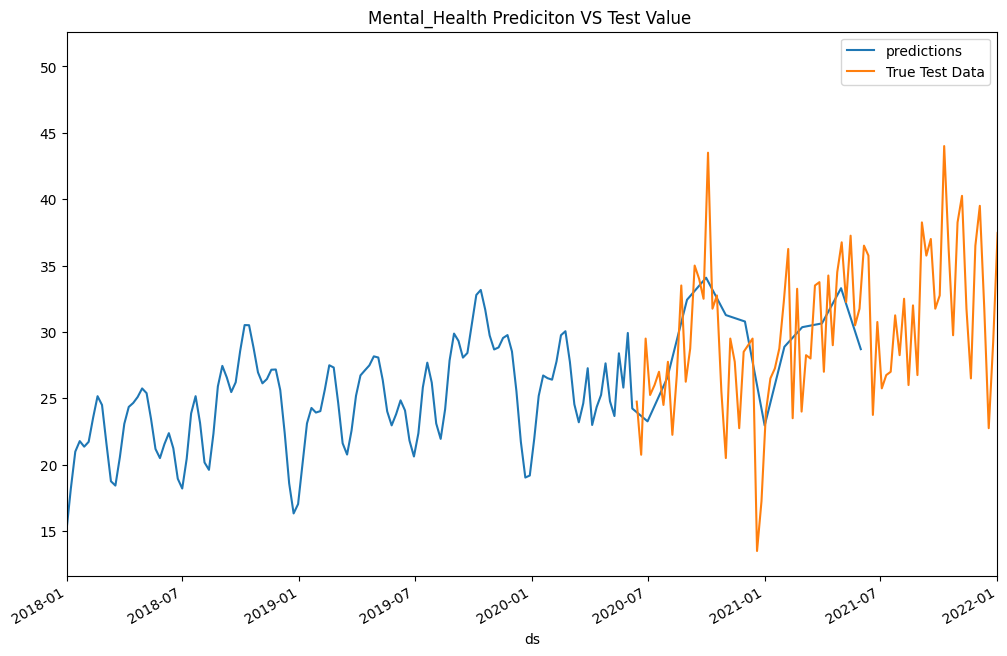

MSE for Mental_Health: 116


In [146]:
least_list= [least_depression,least_anxiety,least_addiction,least_counselling,least_mental_health]
search_list = ['Depression', 'Anxiety', 'Addiction', 'Counselling',
       'Mental_Health']

for item, name in zip(least_list, search_list):

    item['ds']=pd.to_datetime(item.ds)

    
    train=item[:128]
    test=item[128:]
    m=Prophet(holidays=least_lockdowns)
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    m.plot(forecast)
    plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
    plt.title(f'{name} Prediction For States With Least Restrictions')
    ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2018-01-01','2022-01-01'))
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    plt.title(f'{name} Prediciton VS Test Value ')
    plt.show()


    print(f"MSE for {name}: {round(mse(predictions, actuals))}")

# Least restrictions without exogenous features

In [141]:
for item, name in zip(least_list, search_list):
    
    train=item[:128]
    test=item[128:]
    m=Prophet()
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    print(f"MSE for {name}: {round(mse(predictions, actuals))}")

16:13:19 - cmdstanpy - INFO - Chain [1] start processing
16:13:19 - cmdstanpy - INFO - Chain [1] done processing
16:13:19 - cmdstanpy - INFO - Chain [1] start processing
16:13:19 - cmdstanpy - INFO - Chain [1] done processing
16:13:19 - cmdstanpy - INFO - Chain [1] start processing
16:13:19 - cmdstanpy - INFO - Chain [1] done processing


MSE for Depression: 160
MSE for Anxiety: 45


16:13:19 - cmdstanpy - INFO - Chain [1] start processing
16:13:19 - cmdstanpy - INFO - Chain [1] done processing
16:13:19 - cmdstanpy - INFO - Chain [1] start processing
16:13:19 - cmdstanpy - INFO - Chain [1] done processing


MSE for Addiction: 16
MSE for Counselling: 51
MSE for Mental_Health: 116


In [ ]:
# We are looking at the middle of the pandemic
period = '2020-09-30'

# Number of weeks to predict
steps = 7

In [ ]:
(seasonality_mode='multiplicative',changepoint_prior_scale=0.05, changepoint_range =.8,seasonality_prior_scale =1.0,
         holidays_prior_scale = 0.1, growth = 'linear', yearly_seasonality =20)

# Forecasting Searches for Least Restricted States in the Middle of COVID-19 Pandemic

### Most Restricted States With exogenous features '2020-09-30'

16:25:33 - cmdstanpy - INFO - Chain [1] start processing
16:25:33 - cmdstanpy - INFO - Chain [1] done processing


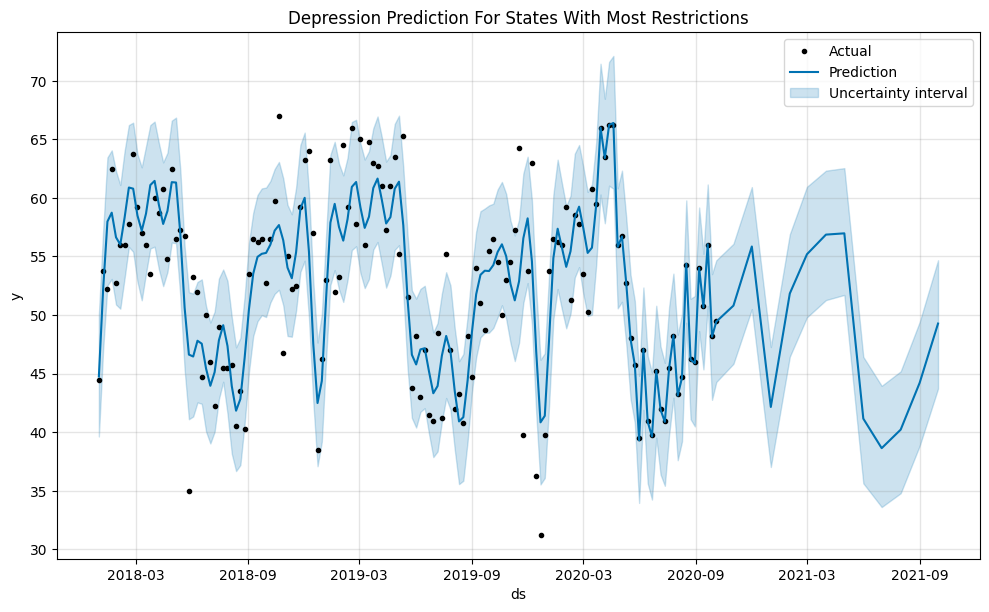

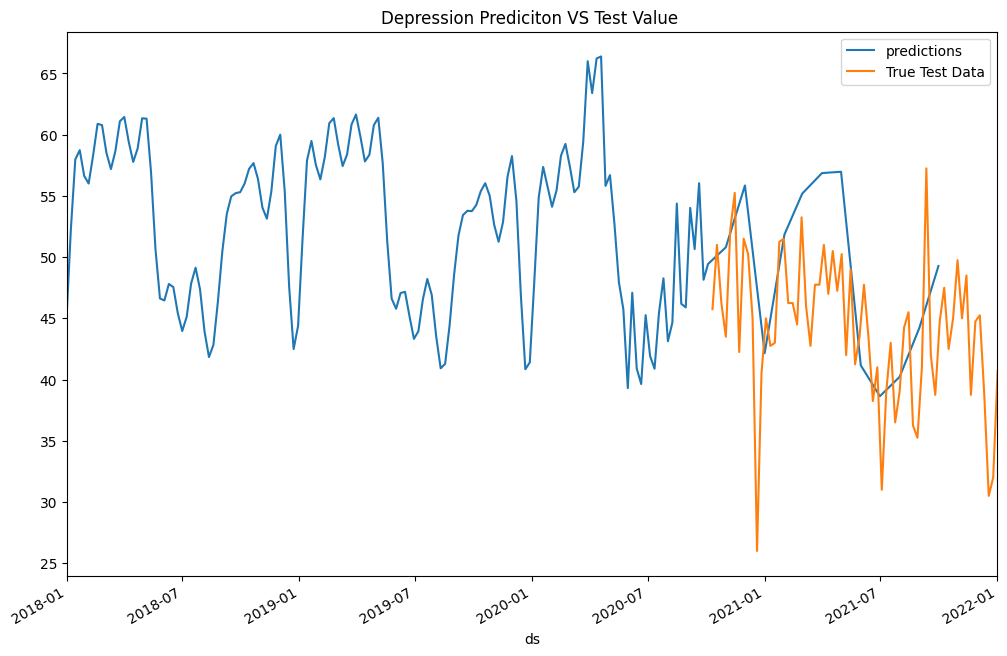

MSE for Depression: 87


16:25:35 - cmdstanpy - INFO - Chain [1] start processing
16:25:35 - cmdstanpy - INFO - Chain [1] done processing


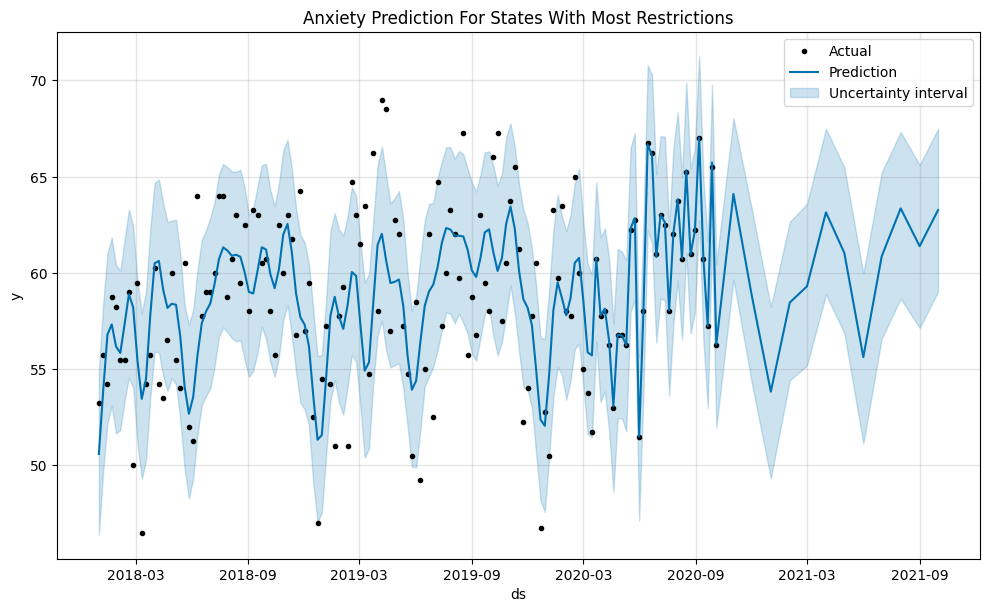

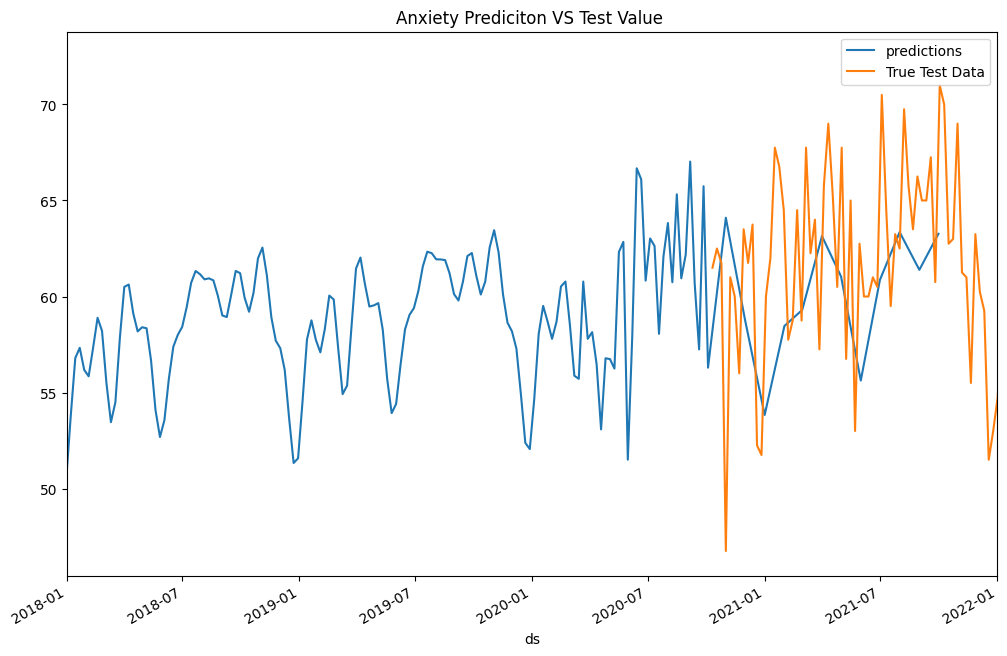

MSE for Anxiety: 37


16:25:37 - cmdstanpy - INFO - Chain [1] start processing
16:25:38 - cmdstanpy - INFO - Chain [1] done processing


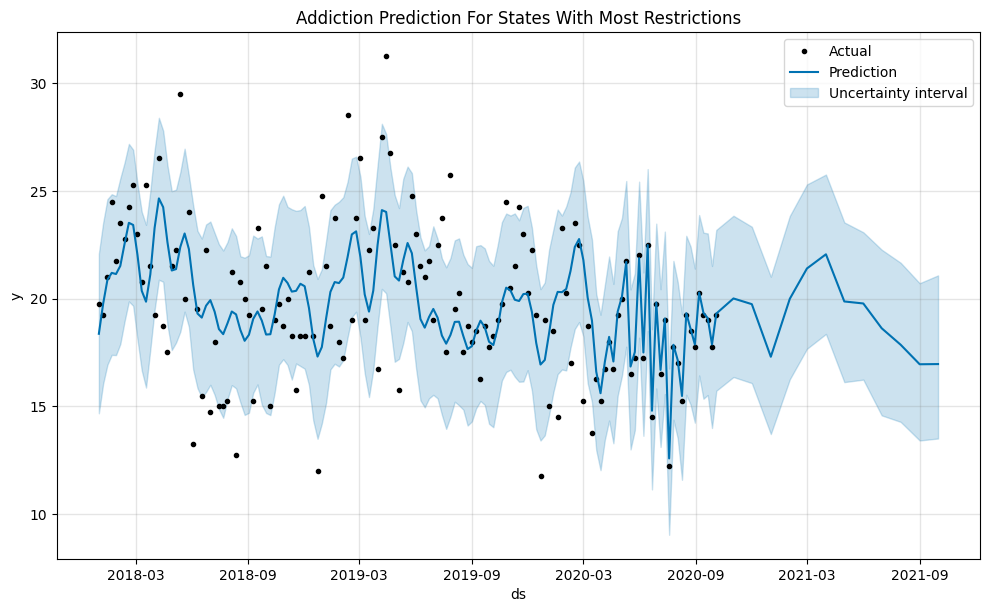

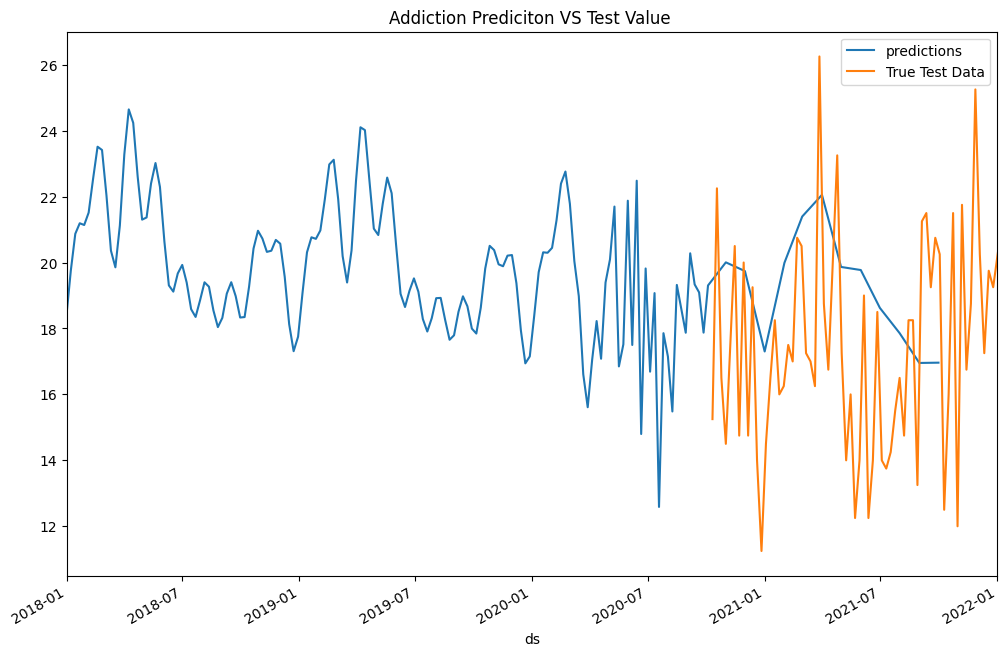

MSE for Addiction: 14


16:25:40 - cmdstanpy - INFO - Chain [1] start processing
16:25:40 - cmdstanpy - INFO - Chain [1] done processing


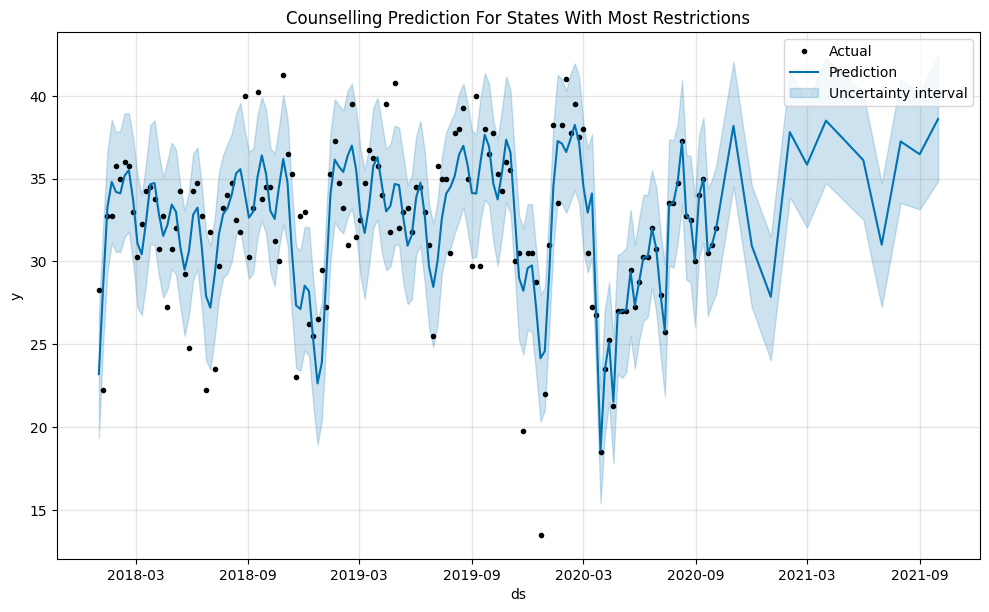

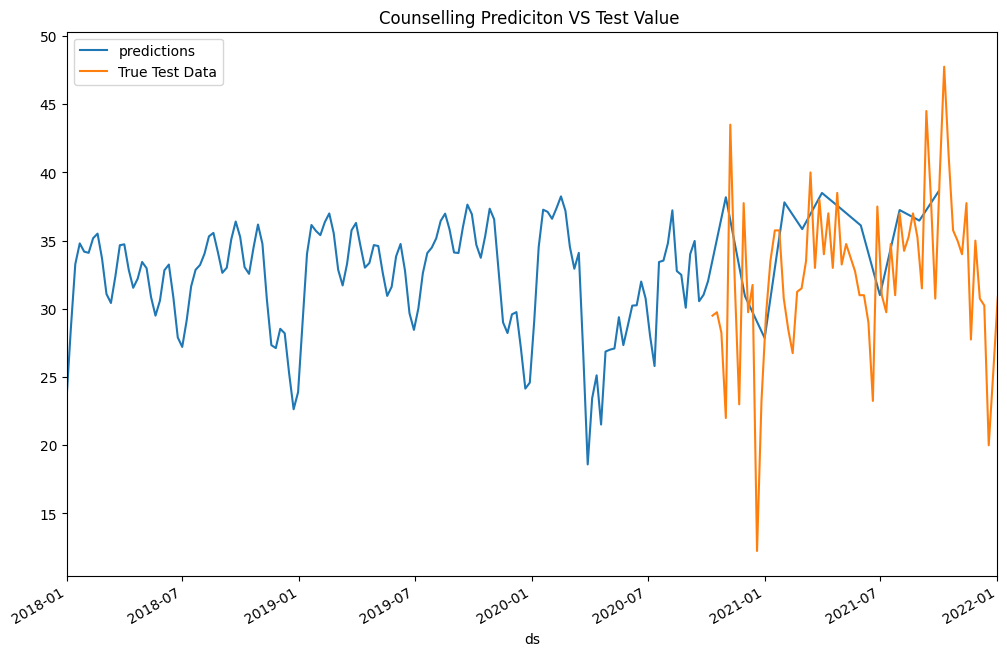

MSE for Counselling: 43


16:25:42 - cmdstanpy - INFO - Chain [1] start processing
16:25:42 - cmdstanpy - INFO - Chain [1] done processing


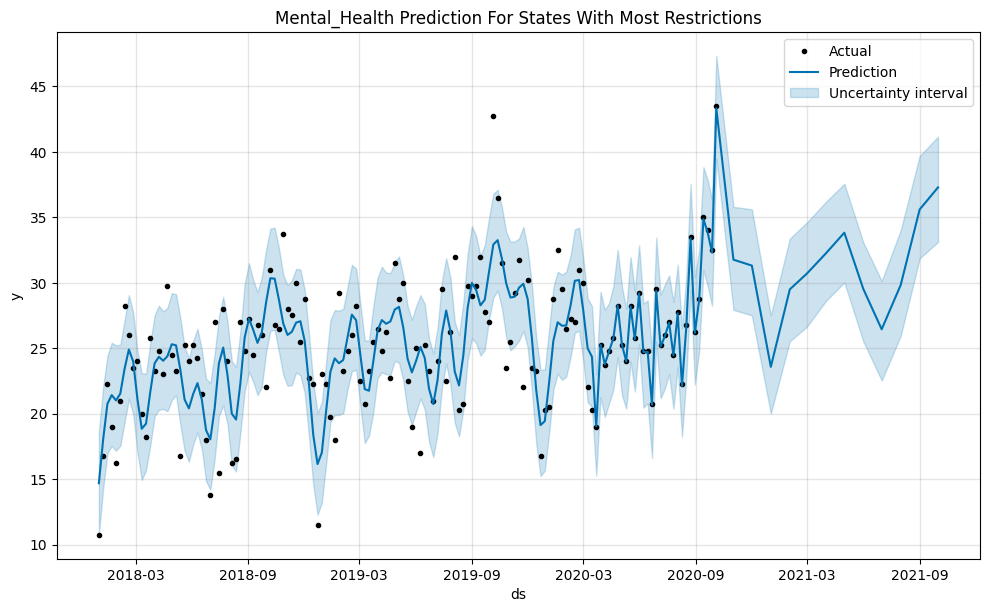

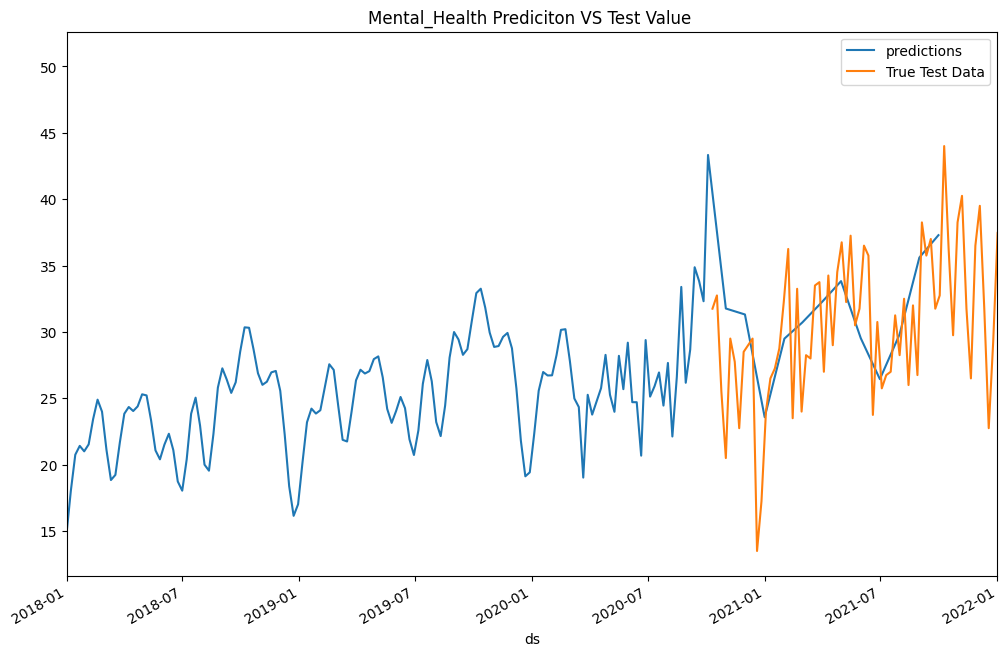

MSE for Mental_Health: 93


In [148]:
most_list= [most_depression,most_anxiety,most_addiction,most_counselling,most_mental_health]
search_list = ['Depression', 'Anxiety', 'Addiction', 'Counselling',
       'Mental_Health']

for item, name in zip(least_list, search_list):
    
    item['ds']=pd.to_datetime(item.ds)

    
    train=item[:145]
    test=item[145:]
    m=Prophet(holidays=most_lockdowns)
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    m.plot(forecast)
    plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
    plt.title(f'{name} Prediction For States With Most Restrictions')
    ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2018-01-01','2022-01-01'))
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    plt.title(f'{name} Prediciton VS Test Value ')
    plt.show()


    print(f"MSE for {name}: {round(mse(predictions, actuals))}")

# Most restricted without exogenous features 2020-09-30

In [160]:
for item, name in zip(most_list, search_list):
    
    train=item[:145]
    test=item[145:]
    m=Prophet(seasonality_mode='multiplicative')
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    print(f"MSE for {name}: {round(mse(predictions, actuals))}")


16:34:16 - cmdstanpy - INFO - Chain [1] start processing
16:34:16 - cmdstanpy - INFO - Chain [1] done processing
16:34:16 - cmdstanpy - INFO - Chain [1] start processing
16:34:16 - cmdstanpy - INFO - Chain [1] done processing


MSE for Depression: 116


16:34:17 - cmdstanpy - INFO - Chain [1] start processing
16:34:17 - cmdstanpy - INFO - Chain [1] done processing


MSE for Anxiety: 43


16:34:17 - cmdstanpy - INFO - Chain [1] start processing
16:34:17 - cmdstanpy - INFO - Chain [1] done processing


MSE for Addiction: 12


16:34:17 - cmdstanpy - INFO - Chain [1] start processing
16:34:17 - cmdstanpy - INFO - Chain [1] done processing


MSE for Counselling: 28
MSE for Mental_Health: 90


# Least Restricted States With exogenous features '2020-09-30'

16:34:11 - cmdstanpy - INFO - Chain [1] start processing
16:34:11 - cmdstanpy - INFO - Chain [1] done processing


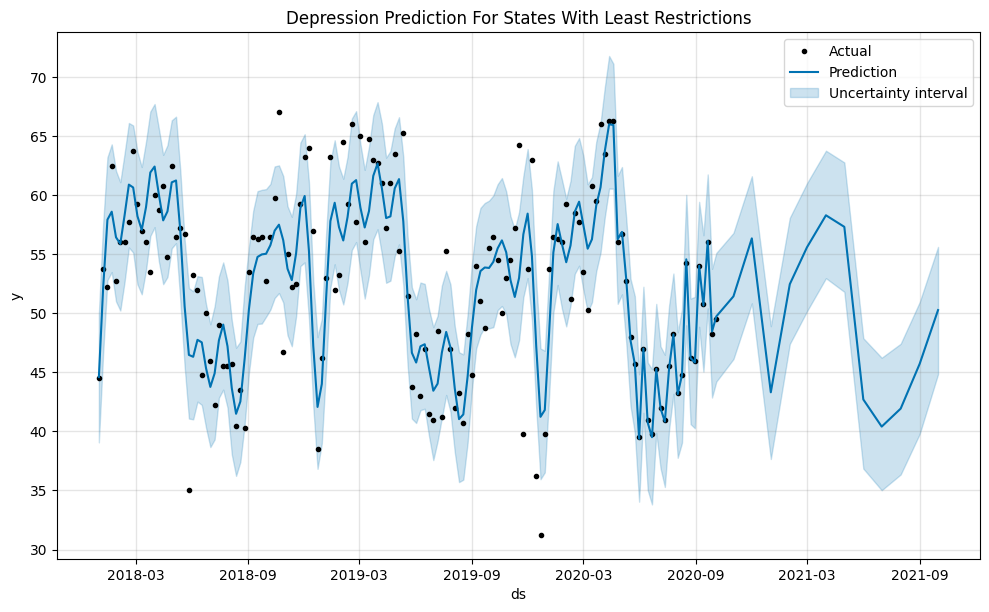

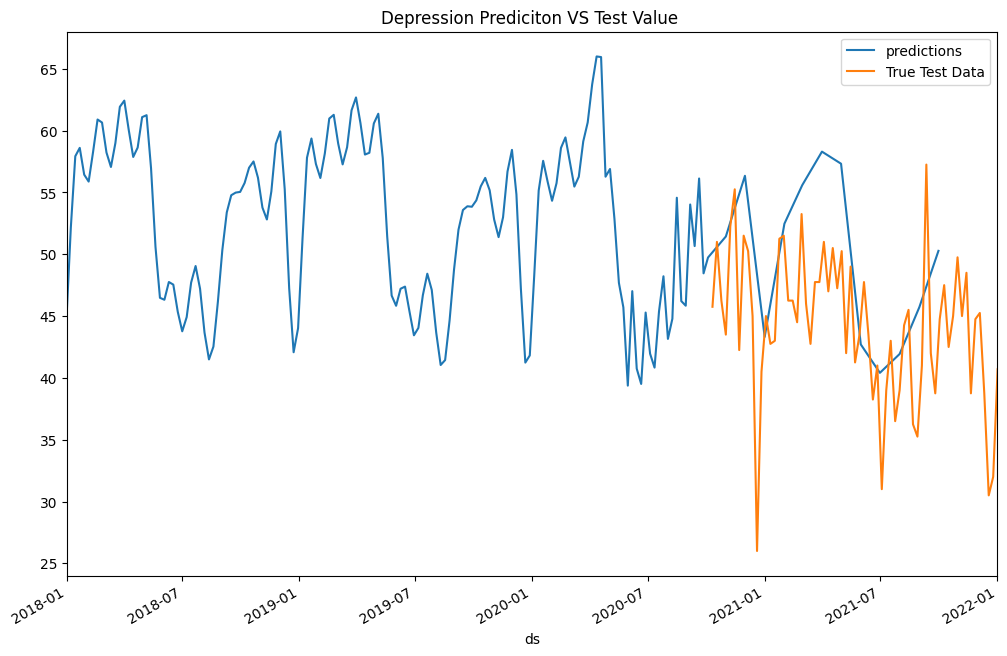

MSE for Depression: 89


16:34:12 - cmdstanpy - INFO - Chain [1] start processing
16:34:12 - cmdstanpy - INFO - Chain [1] done processing


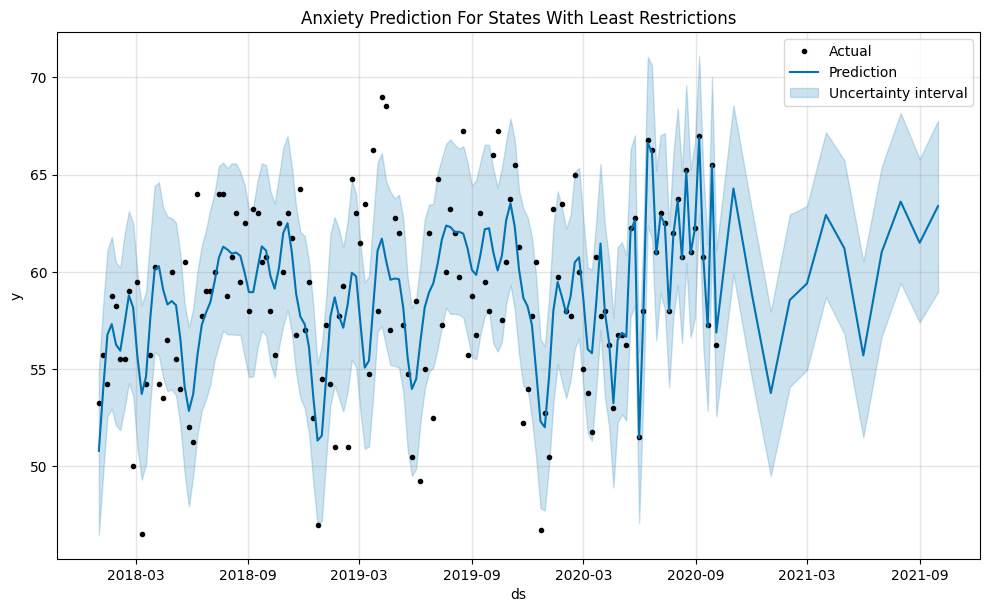

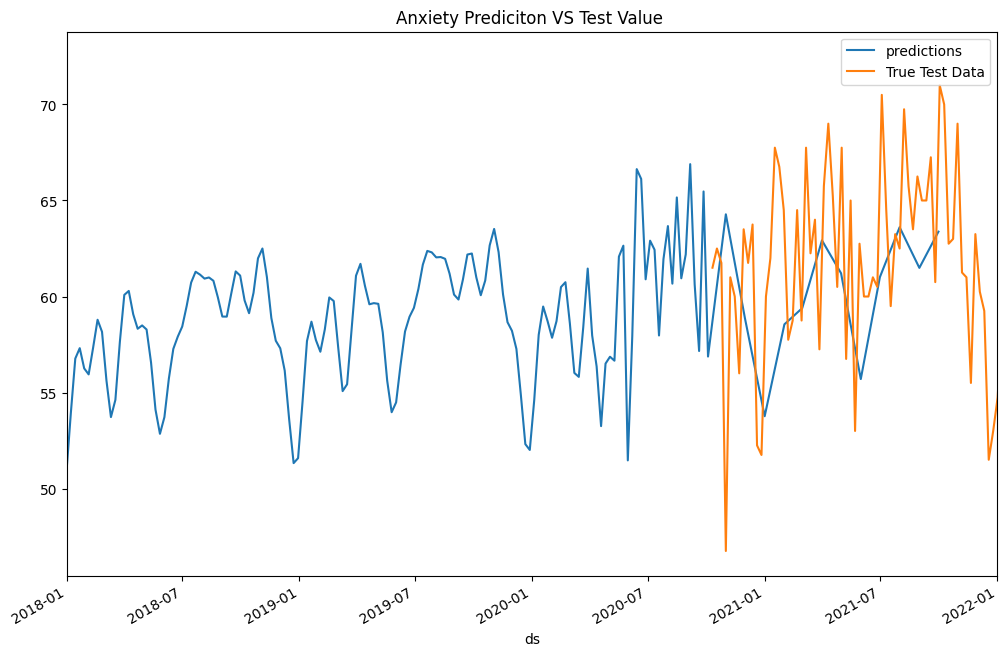

MSE for Anxiety: 37


16:34:13 - cmdstanpy - INFO - Chain [1] start processing
16:34:13 - cmdstanpy - INFO - Chain [1] done processing


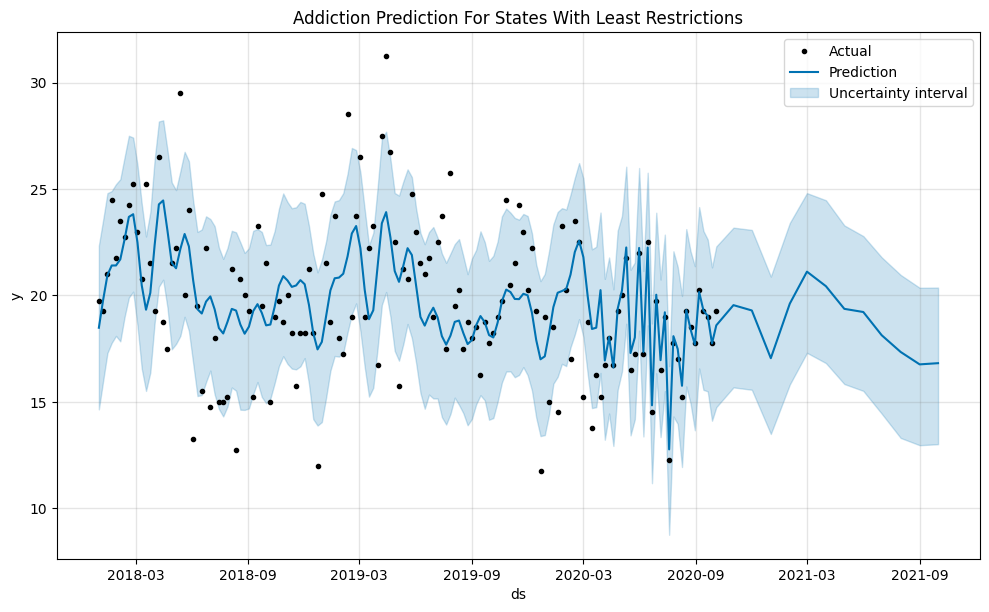

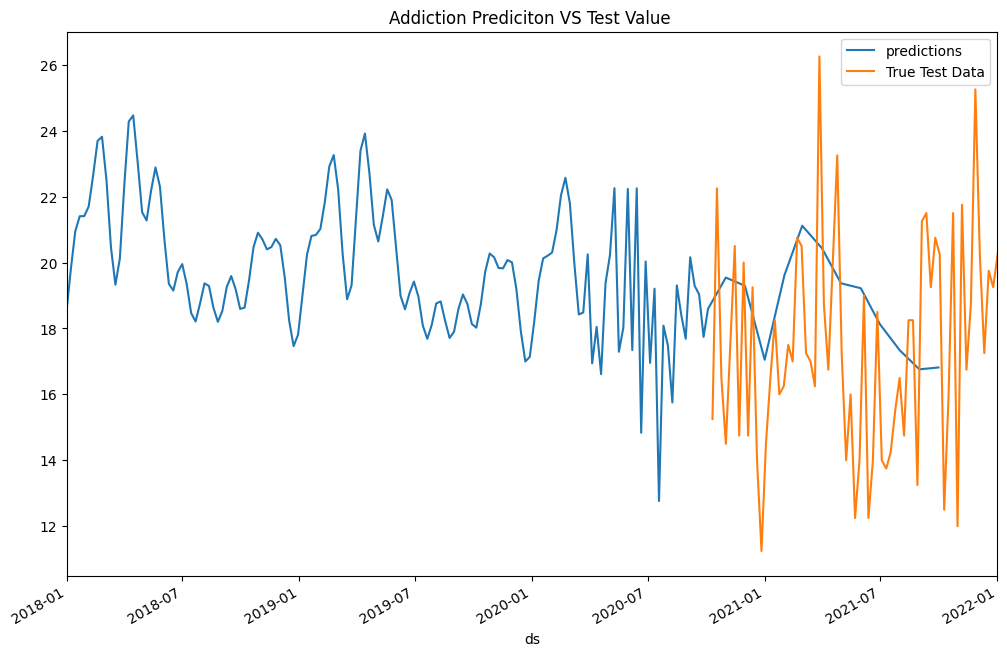

MSE for Addiction: 13


16:34:14 - cmdstanpy - INFO - Chain [1] start processing
16:34:14 - cmdstanpy - INFO - Chain [1] done processing


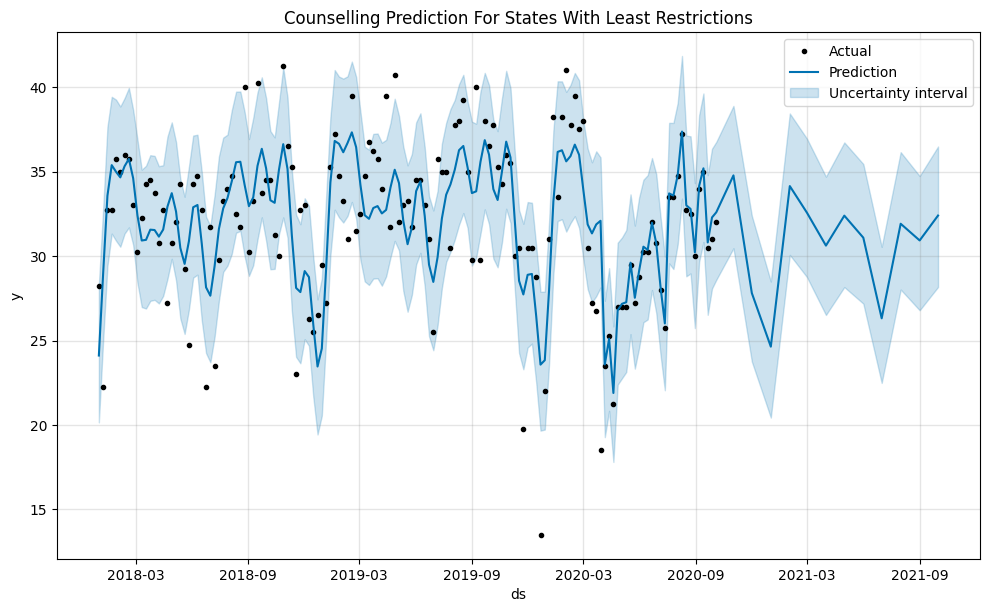

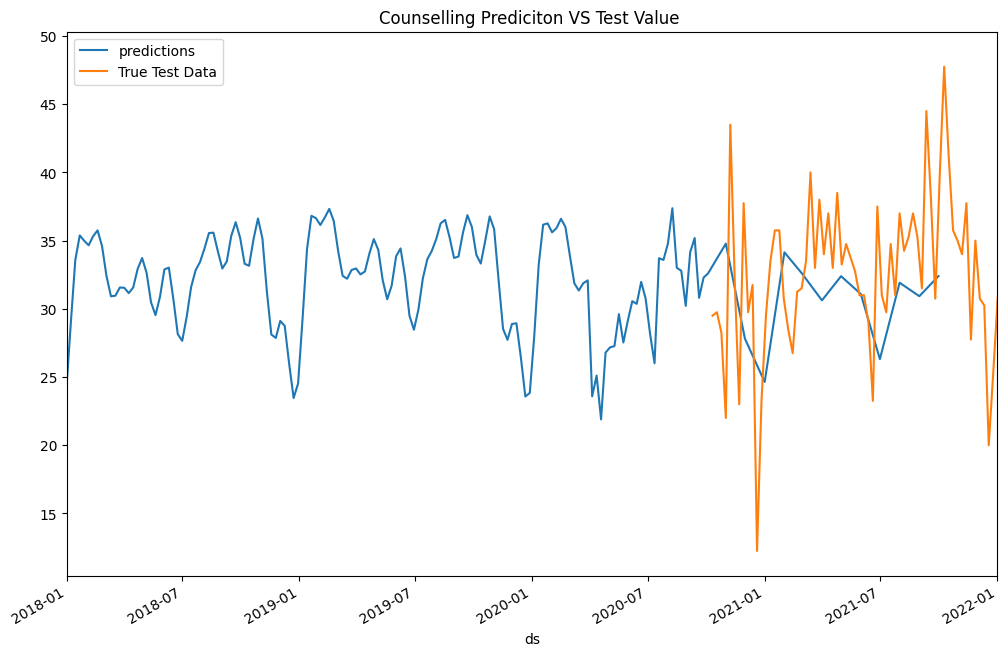

16:34:15 - cmdstanpy - INFO - Chain [1] start processing


MSE for Counselling: 38


16:34:15 - cmdstanpy - INFO - Chain [1] done processing


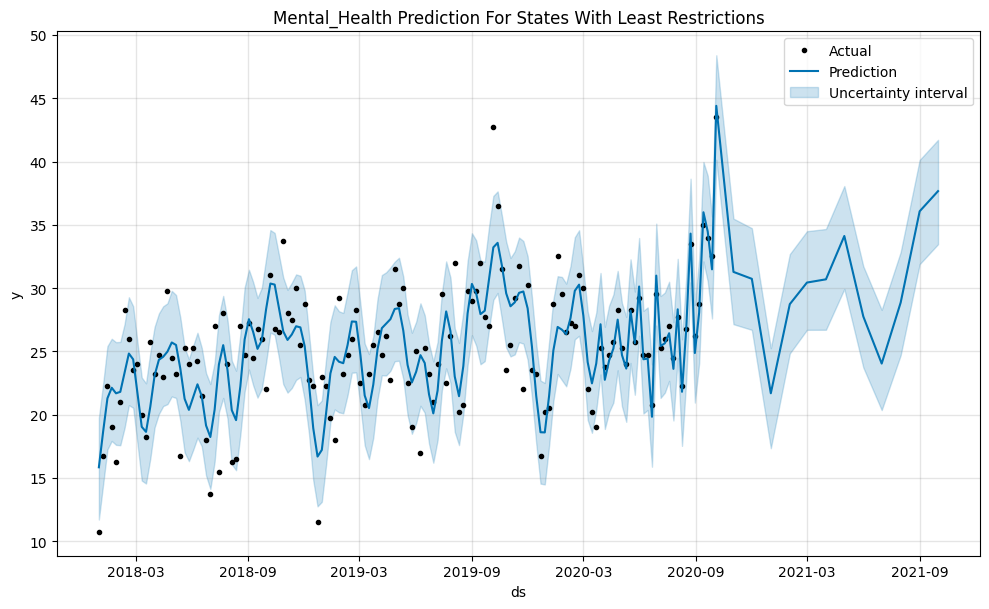

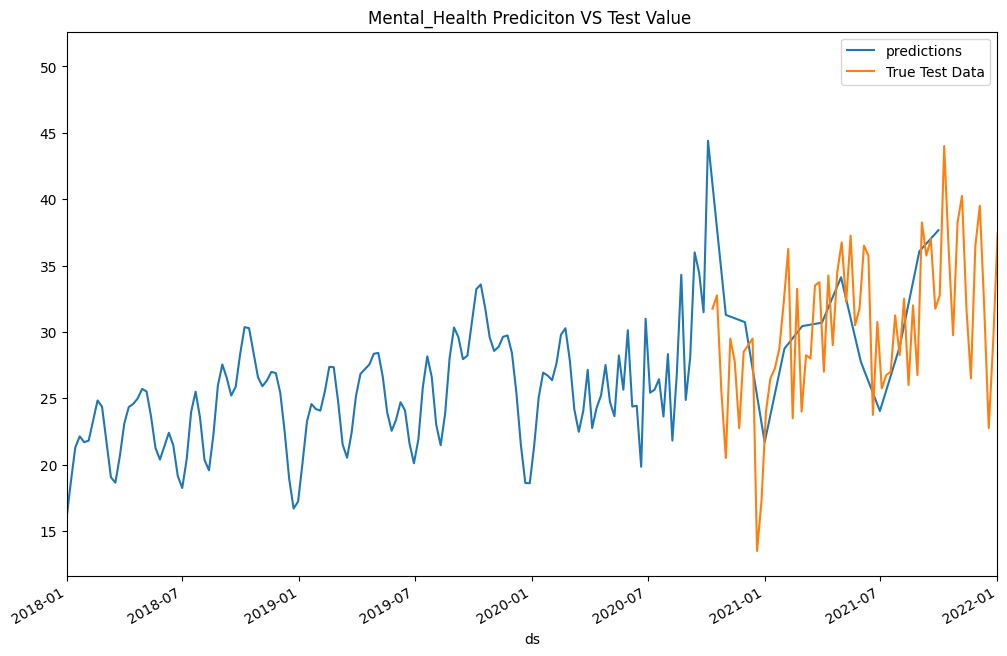

MSE for Mental_Health: 97


In [159]:
least_list= [least_depression,least_anxiety,least_addiction,least_counselling,least_mental_health]
search_list = ['Depression', 'Anxiety', 'Addiction', 'Counselling',
       'Mental_Health']

for item, name in zip(least_list, search_list):

    item['ds']=pd.to_datetime(item.ds)

    
    train=item[:145]
    test=item[145:]
    m=Prophet(holidays=least_lockdowns,seasonality_mode='multiplicative')
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    m.plot(forecast)
    plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
    plt.title(f'{name} Prediction For States With Least Restrictions')
    ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2018-01-01','2022-01-01'))
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    plt.title(f'{name} Prediciton VS Test Value ')
    plt.show()


    print(f"MSE for {name}: {round(mse(predictions, actuals))}")

# Least Restricted States Without exogenous features '2020-09-30'

In [158]:
for item, name in zip(least_list, search_list):
    
    train=item[:145]
    test=item[145:]
    m=Prophet(seasonality_mode='multiplicative')
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    print(f"MSE for {name}: {round(mse(predictions, actuals))}")

16:33:57 - cmdstanpy - INFO - Chain [1] start processing
16:33:57 - cmdstanpy - INFO - Chain [1] done processing
16:33:58 - cmdstanpy - INFO - Chain [1] start processing
16:33:58 - cmdstanpy - INFO - Chain [1] done processing
16:33:58 - cmdstanpy - INFO - Chain [1] start processing
16:33:58 - cmdstanpy - INFO - Chain [1] done processing


MSE for Depression: 89
MSE for Anxiety: 34


16:33:58 - cmdstanpy - INFO - Chain [1] start processing
16:33:58 - cmdstanpy - INFO - Chain [1] done processing
16:33:58 - cmdstanpy - INFO - Chain [1] start processing
16:33:58 - cmdstanpy - INFO - Chain [1] done processing


MSE for Addiction: 13
MSE for Counselling: 35
MSE for Mental_Health: 92


# Prophet Searches for Most Restricted towards the end of COVID-19 Pandemic 2021-01-01
# Most restricted states with exogenous features

17:03:31 - cmdstanpy - INFO - Chain [1] start processing
17:03:32 - cmdstanpy - INFO - Chain [1] done processing


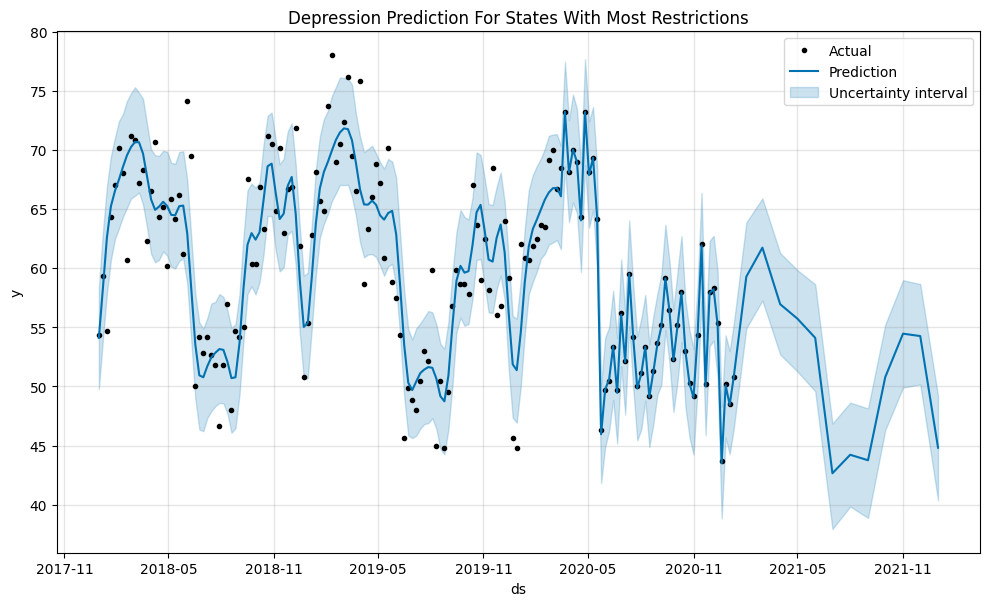

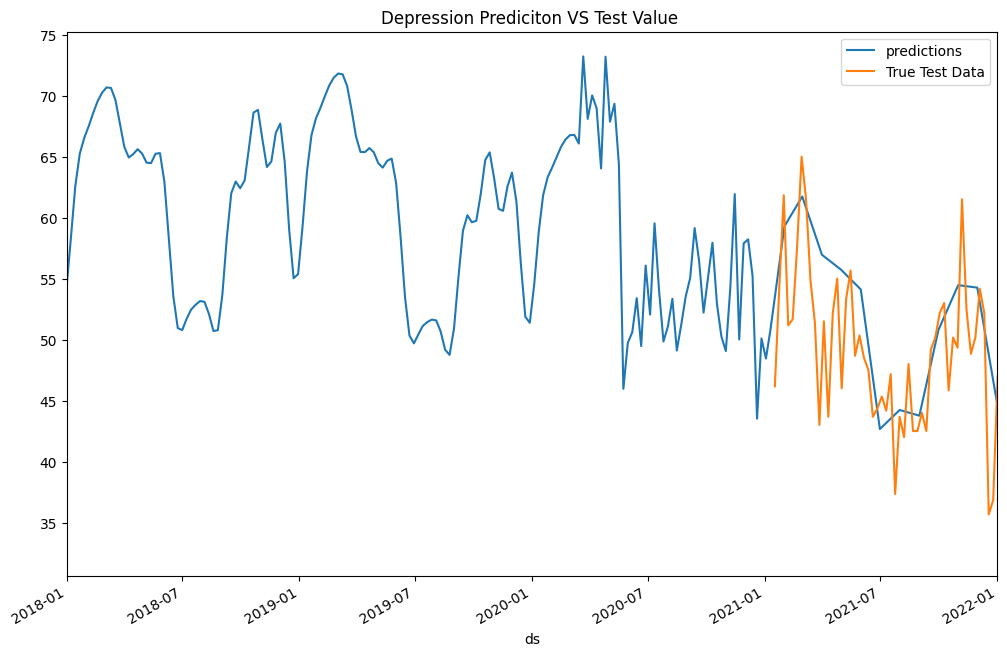

MSE for Depression: 160


17:03:34 - cmdstanpy - INFO - Chain [1] start processing
17:03:34 - cmdstanpy - INFO - Chain [1] done processing


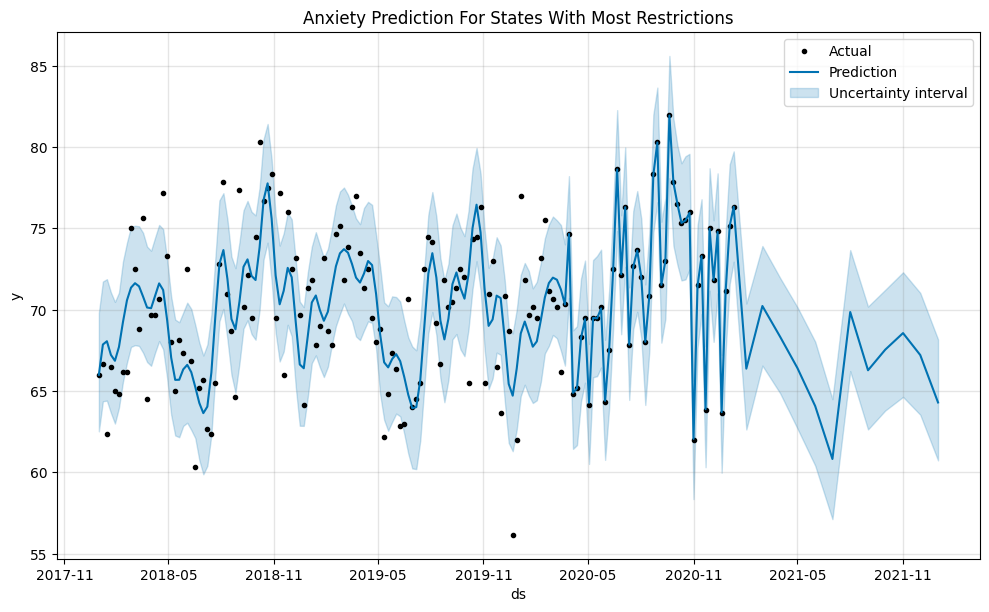

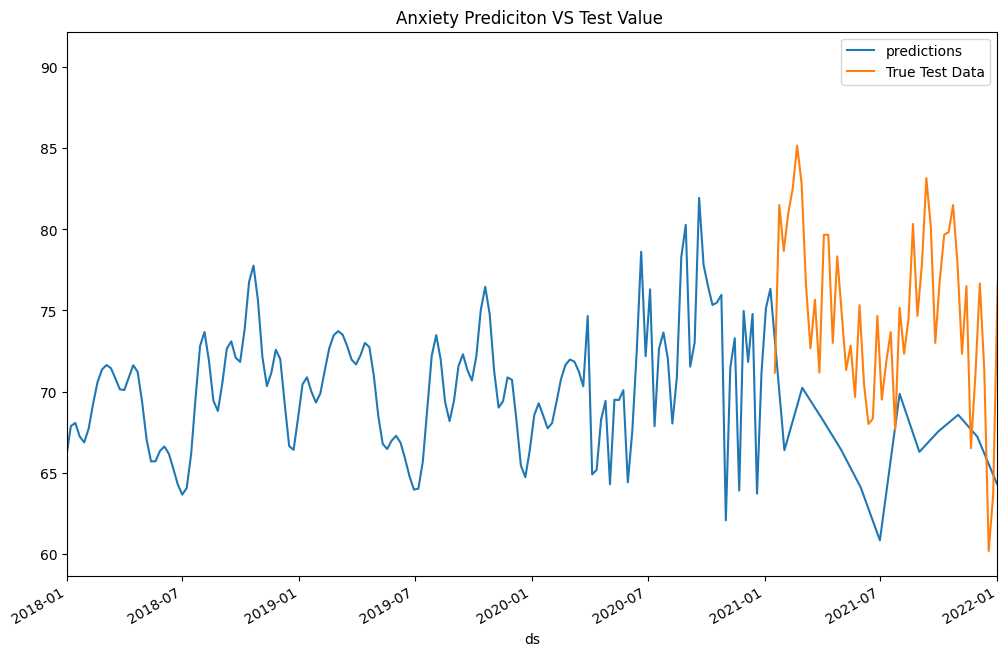

MSE for Anxiety: 80


17:03:36 - cmdstanpy - INFO - Chain [1] start processing
17:03:36 - cmdstanpy - INFO - Chain [1] done processing


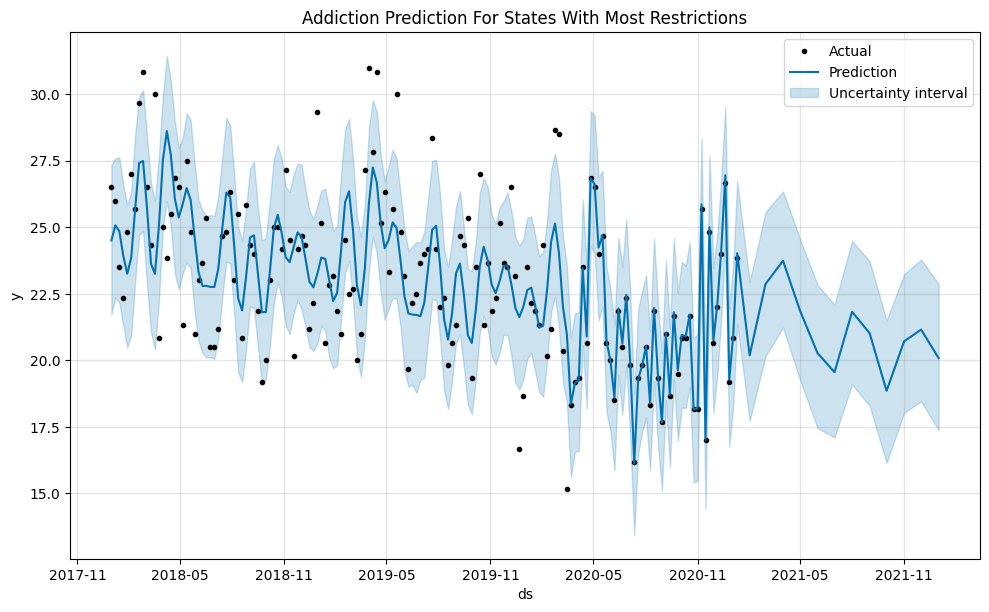

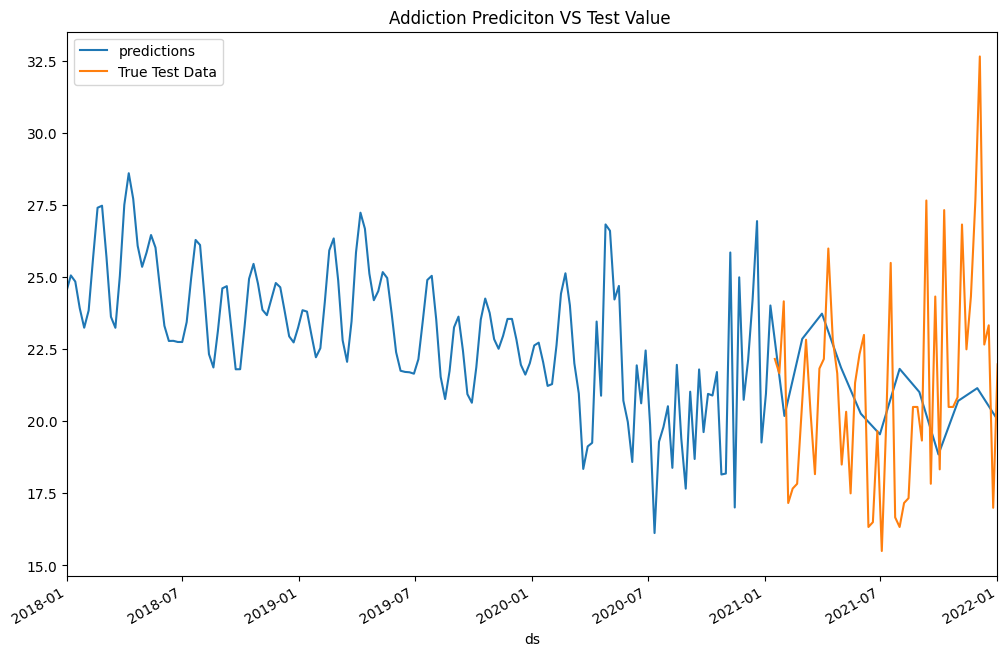

MSE for Addiction: 12


17:03:38 - cmdstanpy - INFO - Chain [1] start processing
17:03:39 - cmdstanpy - INFO - Chain [1] done processing


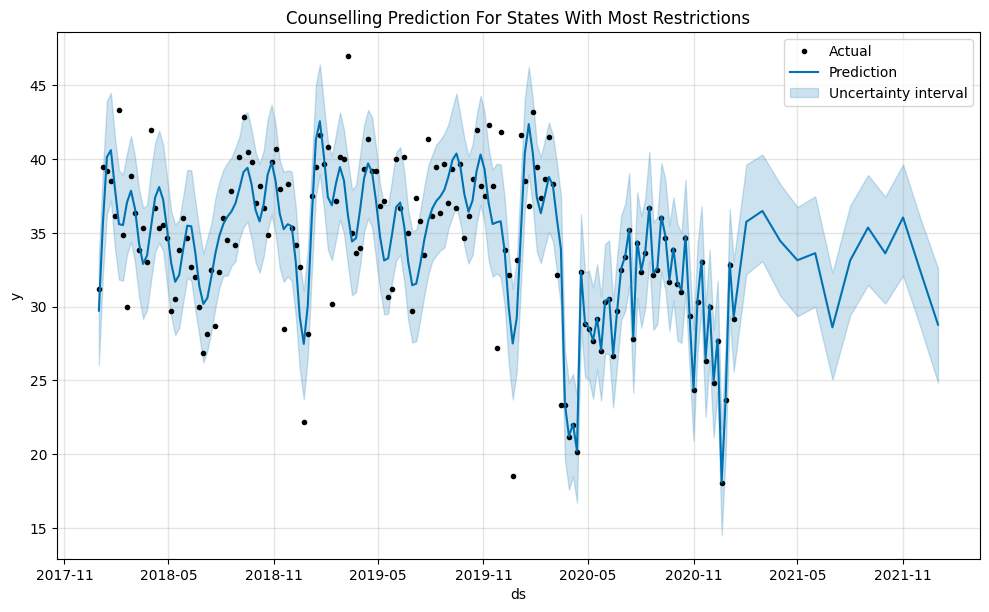

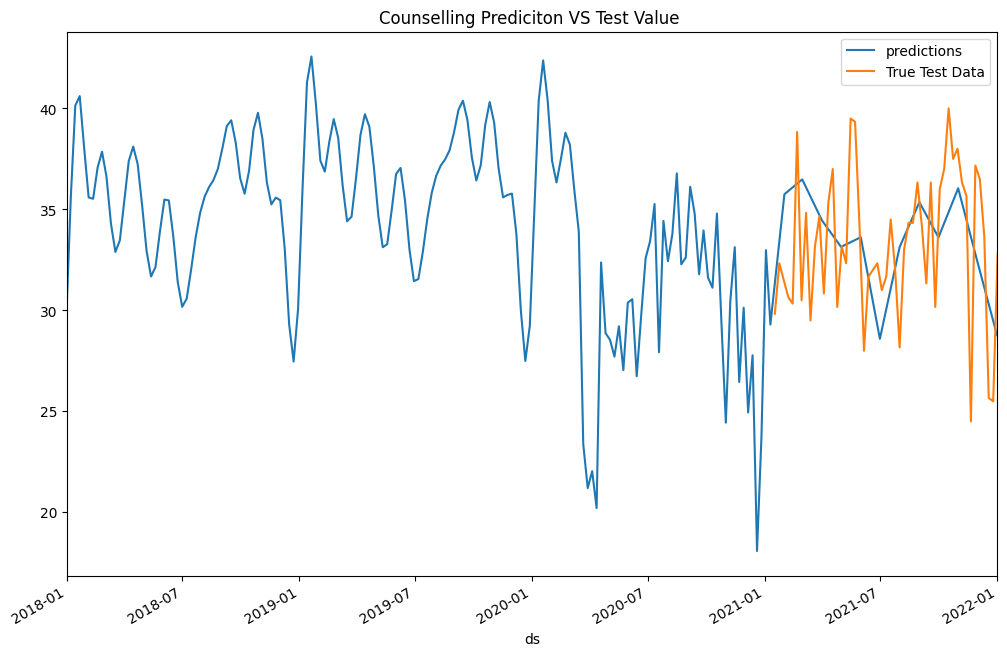

MSE for Counselling: 35


17:03:41 - cmdstanpy - INFO - Chain [1] start processing
17:03:42 - cmdstanpy - INFO - Chain [1] done processing


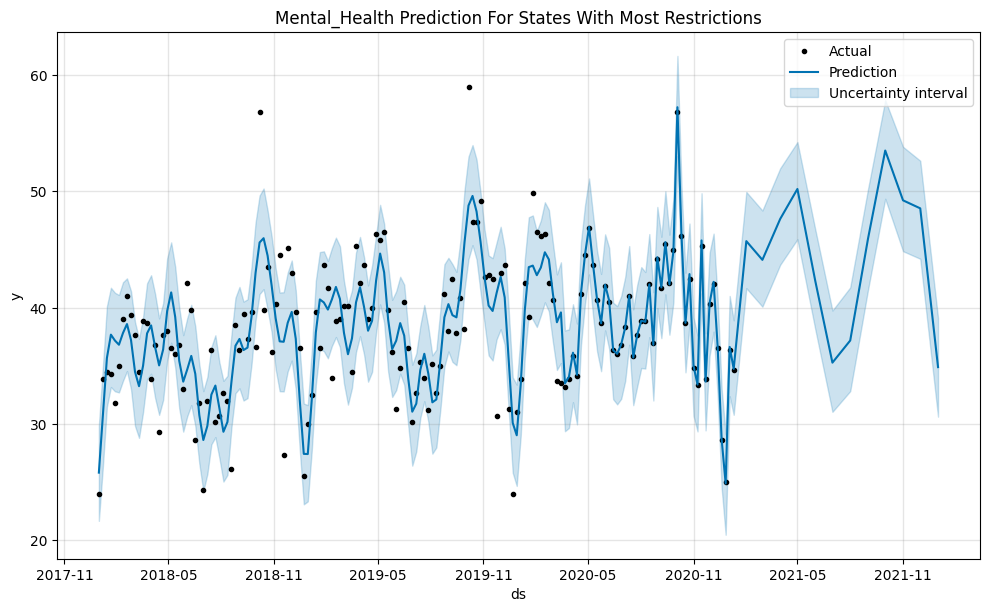

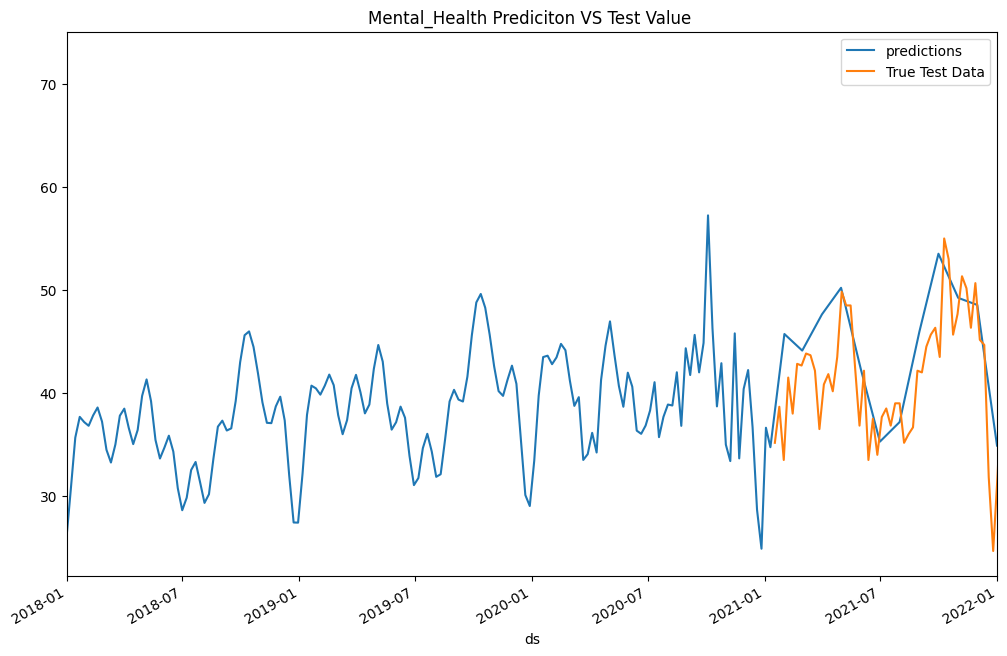

MSE for Mental_Health: 162


In [179]:
most_list= [most_depression,most_anxiety,most_addiction,most_counselling,most_mental_health]
search_list = ['Depression', 'Anxiety', 'Addiction', 'Counselling',
       'Mental_Health']

for item, name in zip(most_list, search_list):
    
    item['ds']=pd.to_datetime(item.ds)

    
    train=item[:159]
    test=item[159:]
    m=Prophet(holidays=most_lockdowns,seasonality_mode='multiplicative')
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    m.plot(forecast)
    plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
    plt.title(f'{name} Prediction For States With Most Restrictions')
    ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2018-01-01','2022-01-01'))
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    plt.title(f'{name} Prediciton VS Test Value ')
    plt.show()


    print(f"MSE for {name}: {round(mse(predictions, actuals))}")

# Most restricted without exogenous features 2021-01-01

In [162]:
for item, name in zip(most_list, search_list):
    
    train=item[:159]
    test=item[159:]
    m=Prophet()
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    print(f"MSE for {name}: {round(mse(predictions, actuals))}")

16:47:22 - cmdstanpy - INFO - Chain [1] start processing
16:47:22 - cmdstanpy - INFO - Chain [1] done processing
16:47:22 - cmdstanpy - INFO - Chain [1] start processing
16:47:22 - cmdstanpy - INFO - Chain [1] done processing
16:47:22 - cmdstanpy - INFO - Chain [1] start processing
16:47:22 - cmdstanpy - INFO - Chain [1] done processing


MSE for Depression: 160
MSE for Anxiety: 67


16:47:22 - cmdstanpy - INFO - Chain [1] start processing
16:47:22 - cmdstanpy - INFO - Chain [1] done processing
16:47:22 - cmdstanpy - INFO - Chain [1] start processing
16:47:22 - cmdstanpy - INFO - Chain [1] done processing


MSE for Addiction: 11
MSE for Counselling: 31
MSE for Mental_Health: 168


# Least restricted with exogenous features 2021-01-01


16:50:34 - cmdstanpy - INFO - Chain [1] start processing
16:50:34 - cmdstanpy - INFO - Chain [1] done processing


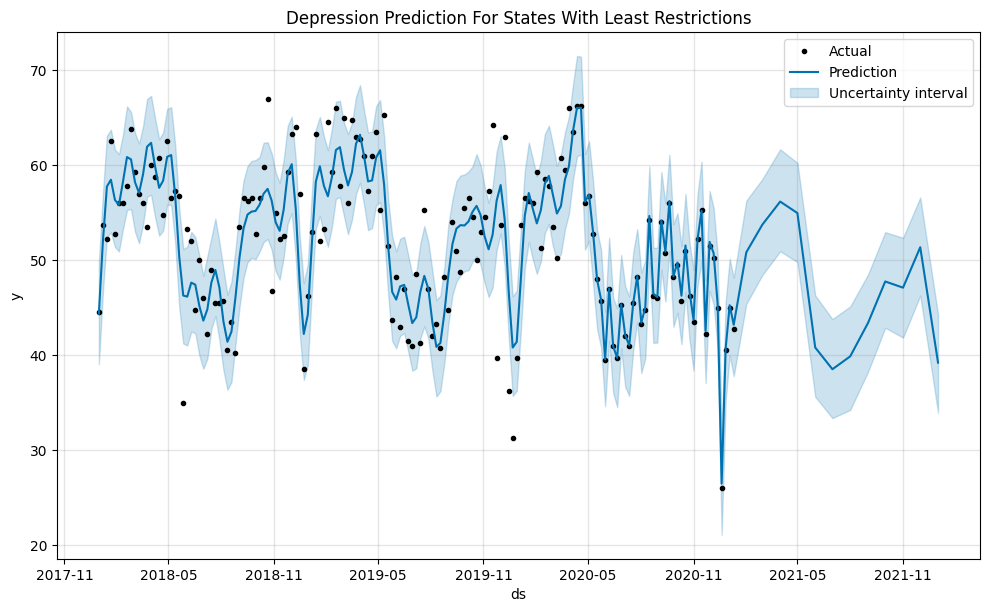

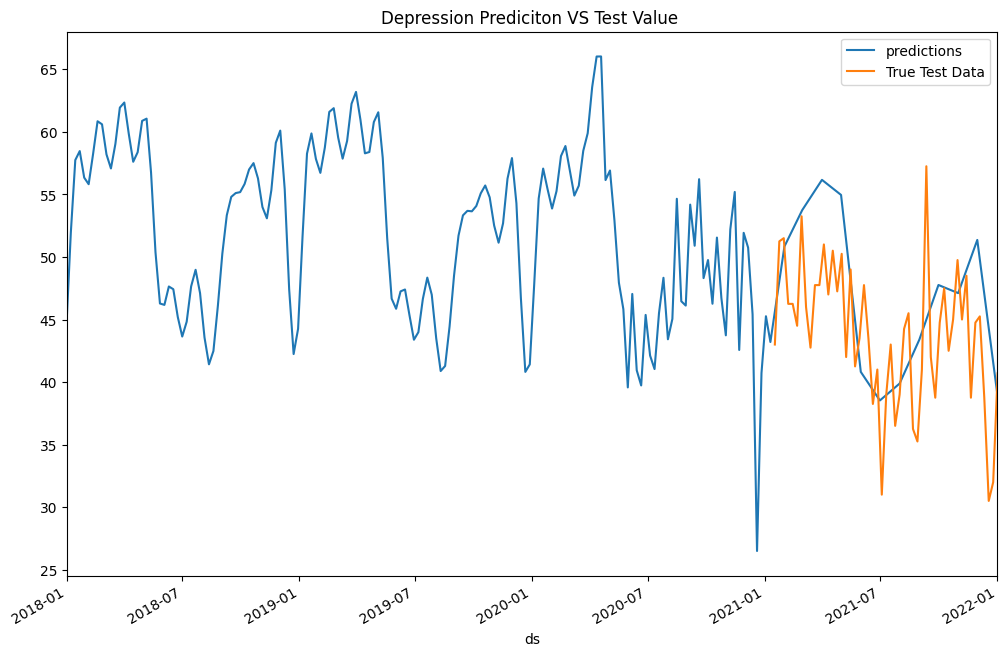

MSE for Depression: 153


16:50:35 - cmdstanpy - INFO - Chain [1] start processing
16:50:35 - cmdstanpy - INFO - Chain [1] done processing


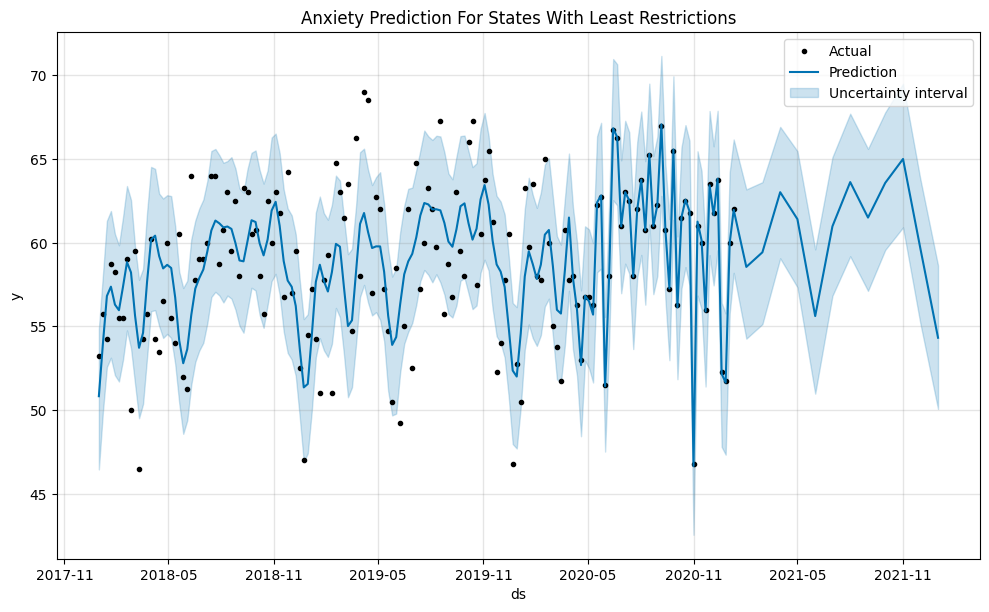

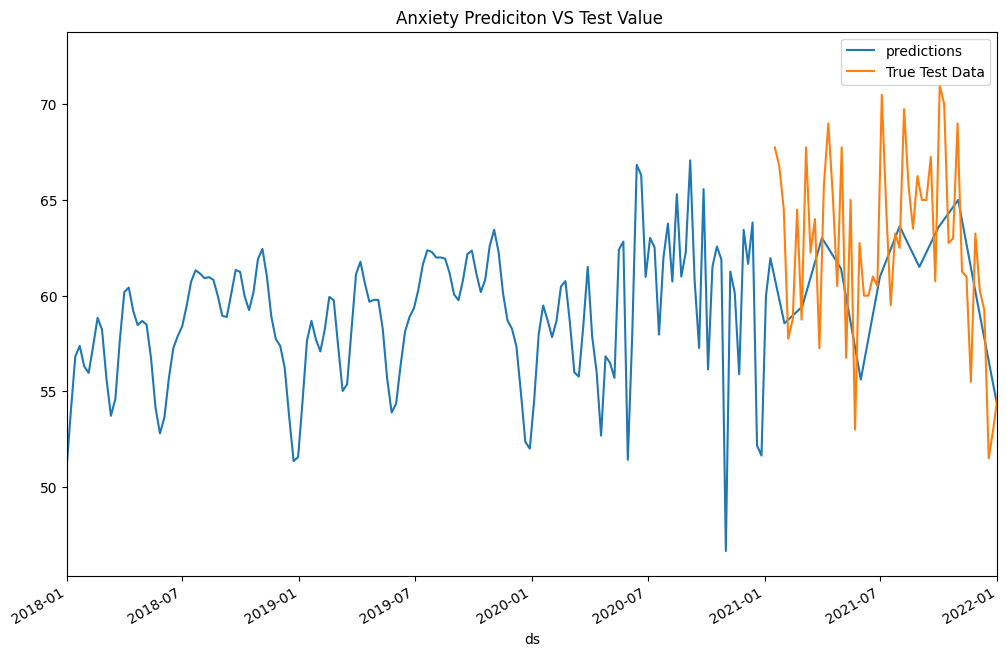

MSE for Anxiety: 48


16:50:36 - cmdstanpy - INFO - Chain [1] start processing
16:50:36 - cmdstanpy - INFO - Chain [1] done processing


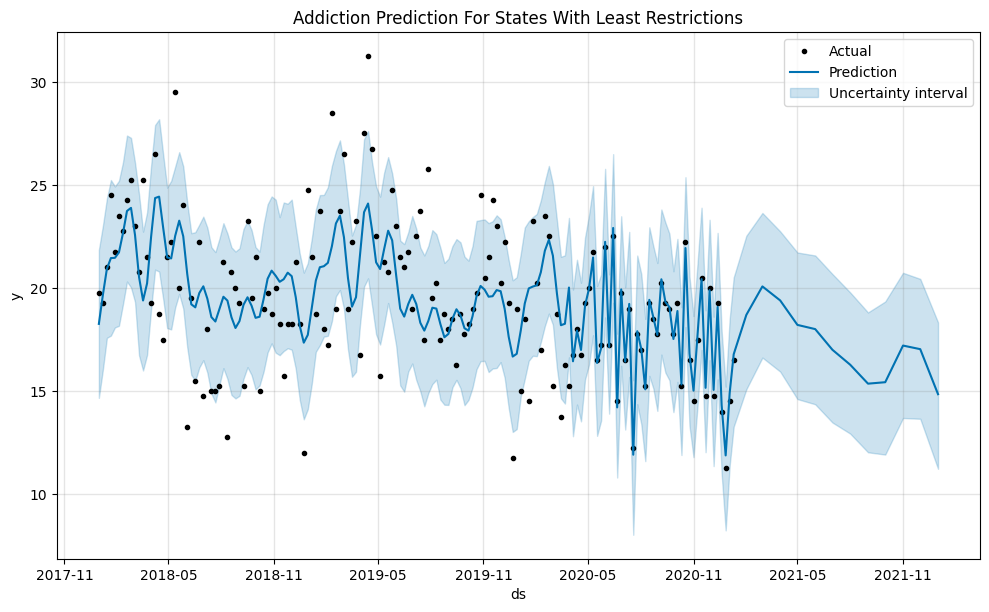

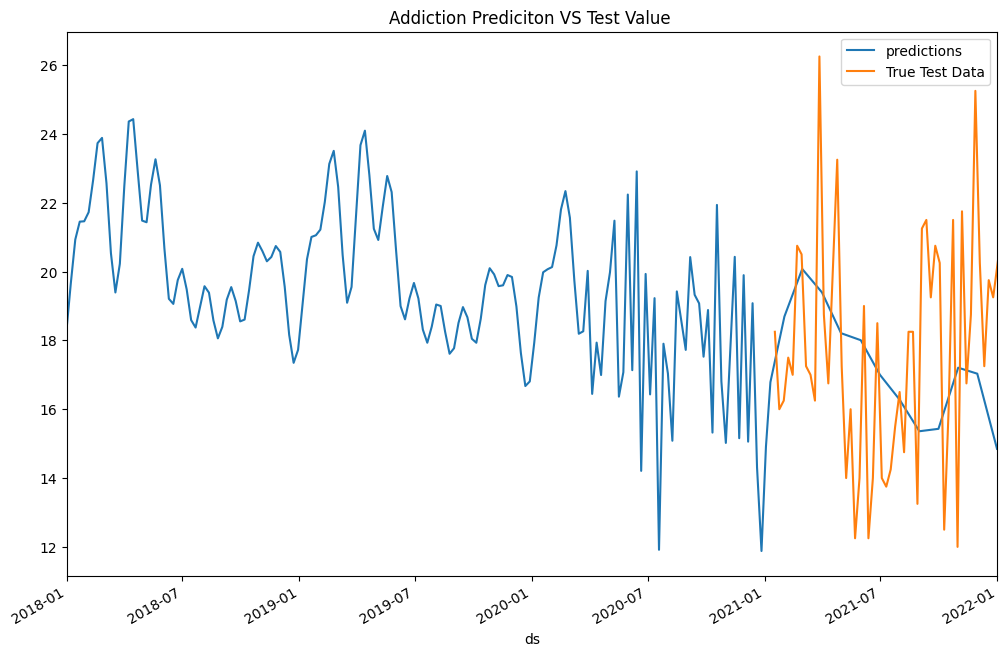

16:50:37 - cmdstanpy - INFO - Chain [1] start processing


MSE for Addiction: 16


16:50:37 - cmdstanpy - INFO - Chain [1] done processing


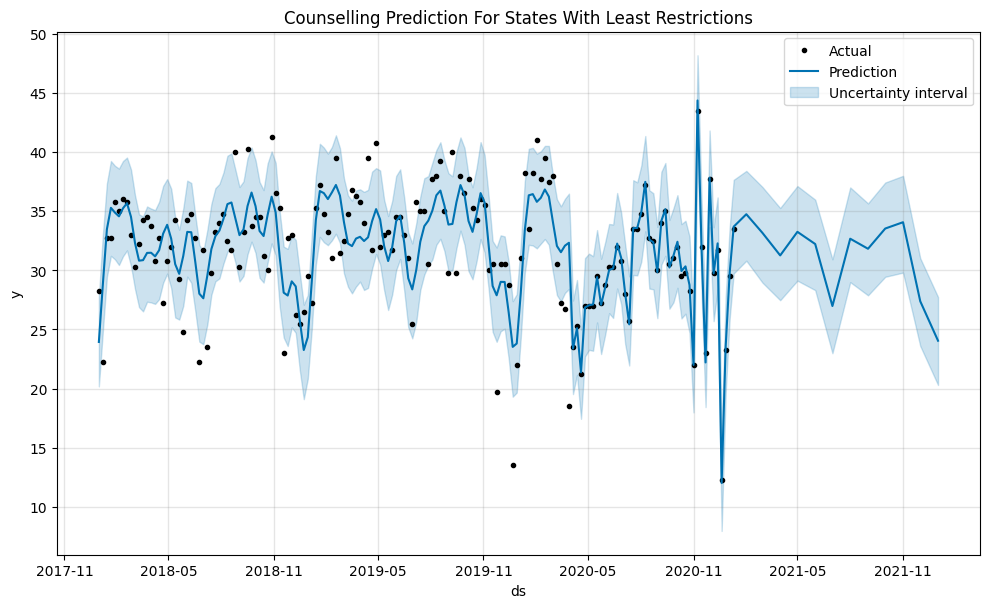

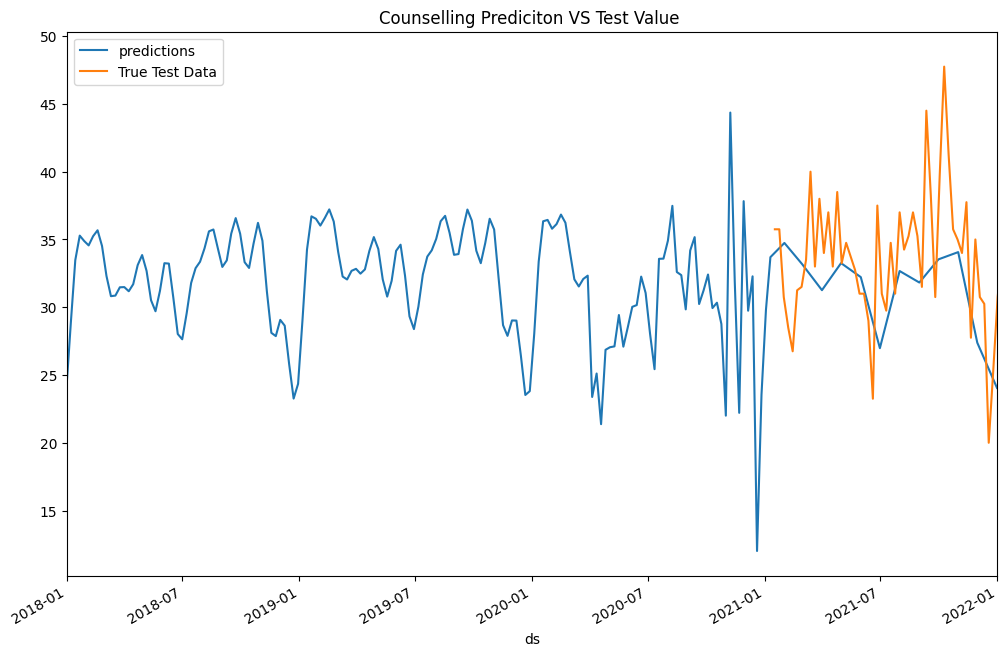

MSE for Counselling: 57


16:50:38 - cmdstanpy - INFO - Chain [1] start processing
16:50:38 - cmdstanpy - INFO - Chain [1] done processing


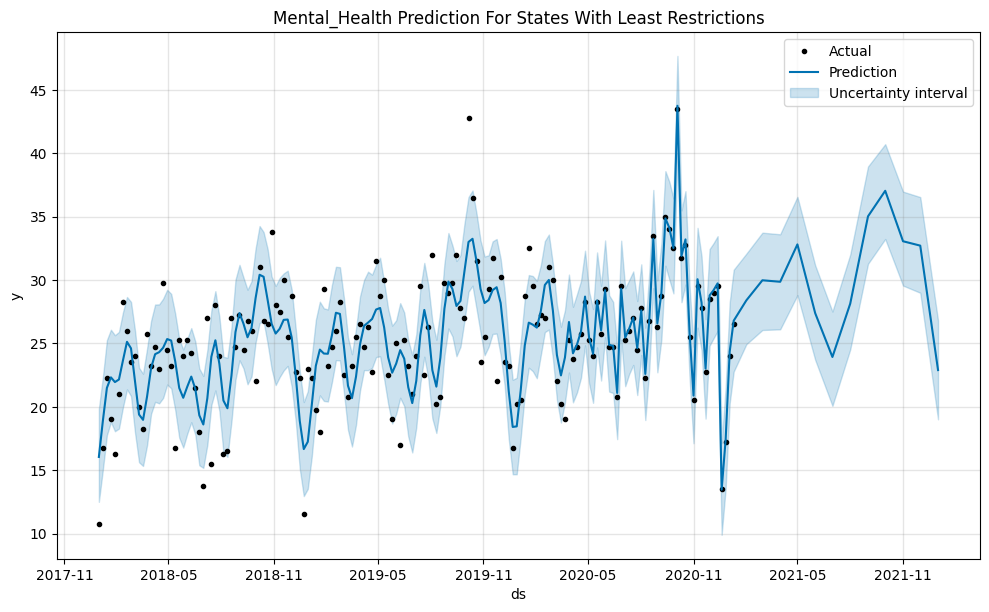

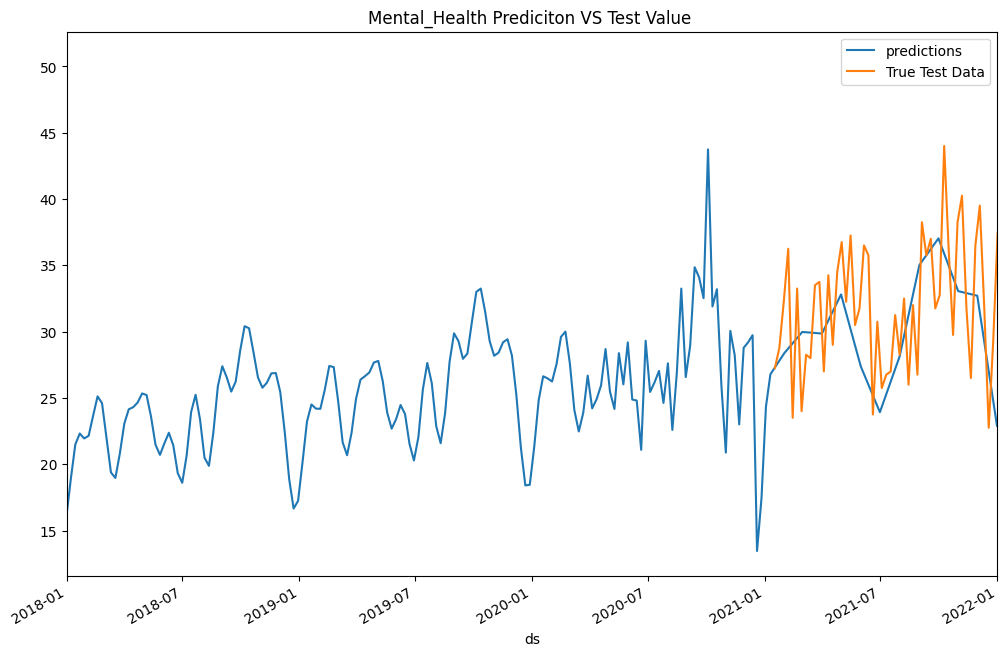

MSE for Mental_Health: 124


In [164]:
least_list= [least_depression,least_anxiety,least_addiction,least_counselling,least_mental_health]
search_list = ['Depression', 'Anxiety', 'Addiction', 'Counselling',
       'Mental_Health']

for item, name in zip(least_list, search_list):

    item['ds']=pd.to_datetime(item.ds)

    
    train=item[:159]
    test=item[159:]
    m=Prophet(holidays=least_lockdowns,seasonality_mode='multiplicative')
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    m.plot(forecast)
    plt.legend(['Actual', 'Prediction', 'Uncertainty interval'])
    plt.title(f'{name} Prediction For States With Least Restrictions')
    ax=forecast.plot(x='ds',y='yhat',legend=True,label='predictions',figsize=(12,8))
    test.plot(x='ds',y='y',legend=True,label='True Test Data',ax=ax,xlim=('2018-01-01','2022-01-01'))
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    plt.title(f'{name} Prediciton VS Test Value ')
    plt.show()


    print(f"MSE for {name}: {round(mse(predictions, actuals))}")

# Least restricted without exogenous features 2021-01-01


In [163]:
for item, name in zip(least_list, search_list):
    
    train=item[:159]
    test=item[159:]
    m=Prophet(seasonality_mode='multiplicative')
    m.fit(train)
    future=m.make_future_dataframe(periods=12,freq='MS')
    forecast=m.predict(future)
    predictions = forecast.iloc[-len(test):]['yhat']
    actuals = test['y']
    print(f"MSE for {name}: {round(mse(predictions, actuals))}")

16:49:35 - cmdstanpy - INFO - Chain [1] start processing
16:49:35 - cmdstanpy - INFO - Chain [1] done processing
16:49:35 - cmdstanpy - INFO - Chain [1] start processing
16:49:35 - cmdstanpy - INFO - Chain [1] done processing
16:49:35 - cmdstanpy - INFO - Chain [1] start processing
16:49:35 - cmdstanpy - INFO - Chain [1] done processing


MSE for Depression: 140
MSE for Anxiety: 43


16:49:35 - cmdstanpy - INFO - Chain [1] start processing
16:49:36 - cmdstanpy - INFO - Chain [1] done processing
16:49:36 - cmdstanpy - INFO - Chain [1] start processing
16:49:36 - cmdstanpy - INFO - Chain [1] done processing


MSE for Addiction: 13
MSE for Counselling: 47
MSE for Mental_Health: 123
